# Pythermalcomfort Plotting Examples

This notebook demonstrates the plotting functionality in pythermalcomfort.

## Architecture Overview

The plotting system uses a three-tier architecture:

1. **Style** (mutable) - Figure styling (colors, fonts, sizes)
2. **Scene** (frozen) - Background context computed from thermal comfort models
3. **DataSeries** (frozen) - Overlay data with optional summary distribution

In [1]:
import numpy as np
from pythermalcomfort.models import utci, pmv_ppd_iso, heat_index_rothfusz
from pythermalcomfort.plots import Plot, Style

## 1. Basic Range Plot (UTCI)

Create a simple UTCI thermal stress plot with automatic preset detection.

/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/plots/scenes/range_scene.py:215: RuntimeWarning: Threshold solver: some y-values had no bracket within x_bounds (thr=-40.0: 39 point(s) unsolved, thr=-27.0: 0 point(s) unsolved, thr=-13.0: 0 point(s) unsolved, thr=0.0: 0 point(s) unsolved, thr=9.0: 0 point(s) unsolved, thr=26.0: 0 point(s) unsolved, thr=32.0: 0 point(s) unsolved, thr=38.0: 0 point(s) unsolved, thr=46.0: 9 point(s) unsolved).
  result = solve_threshold_curves(


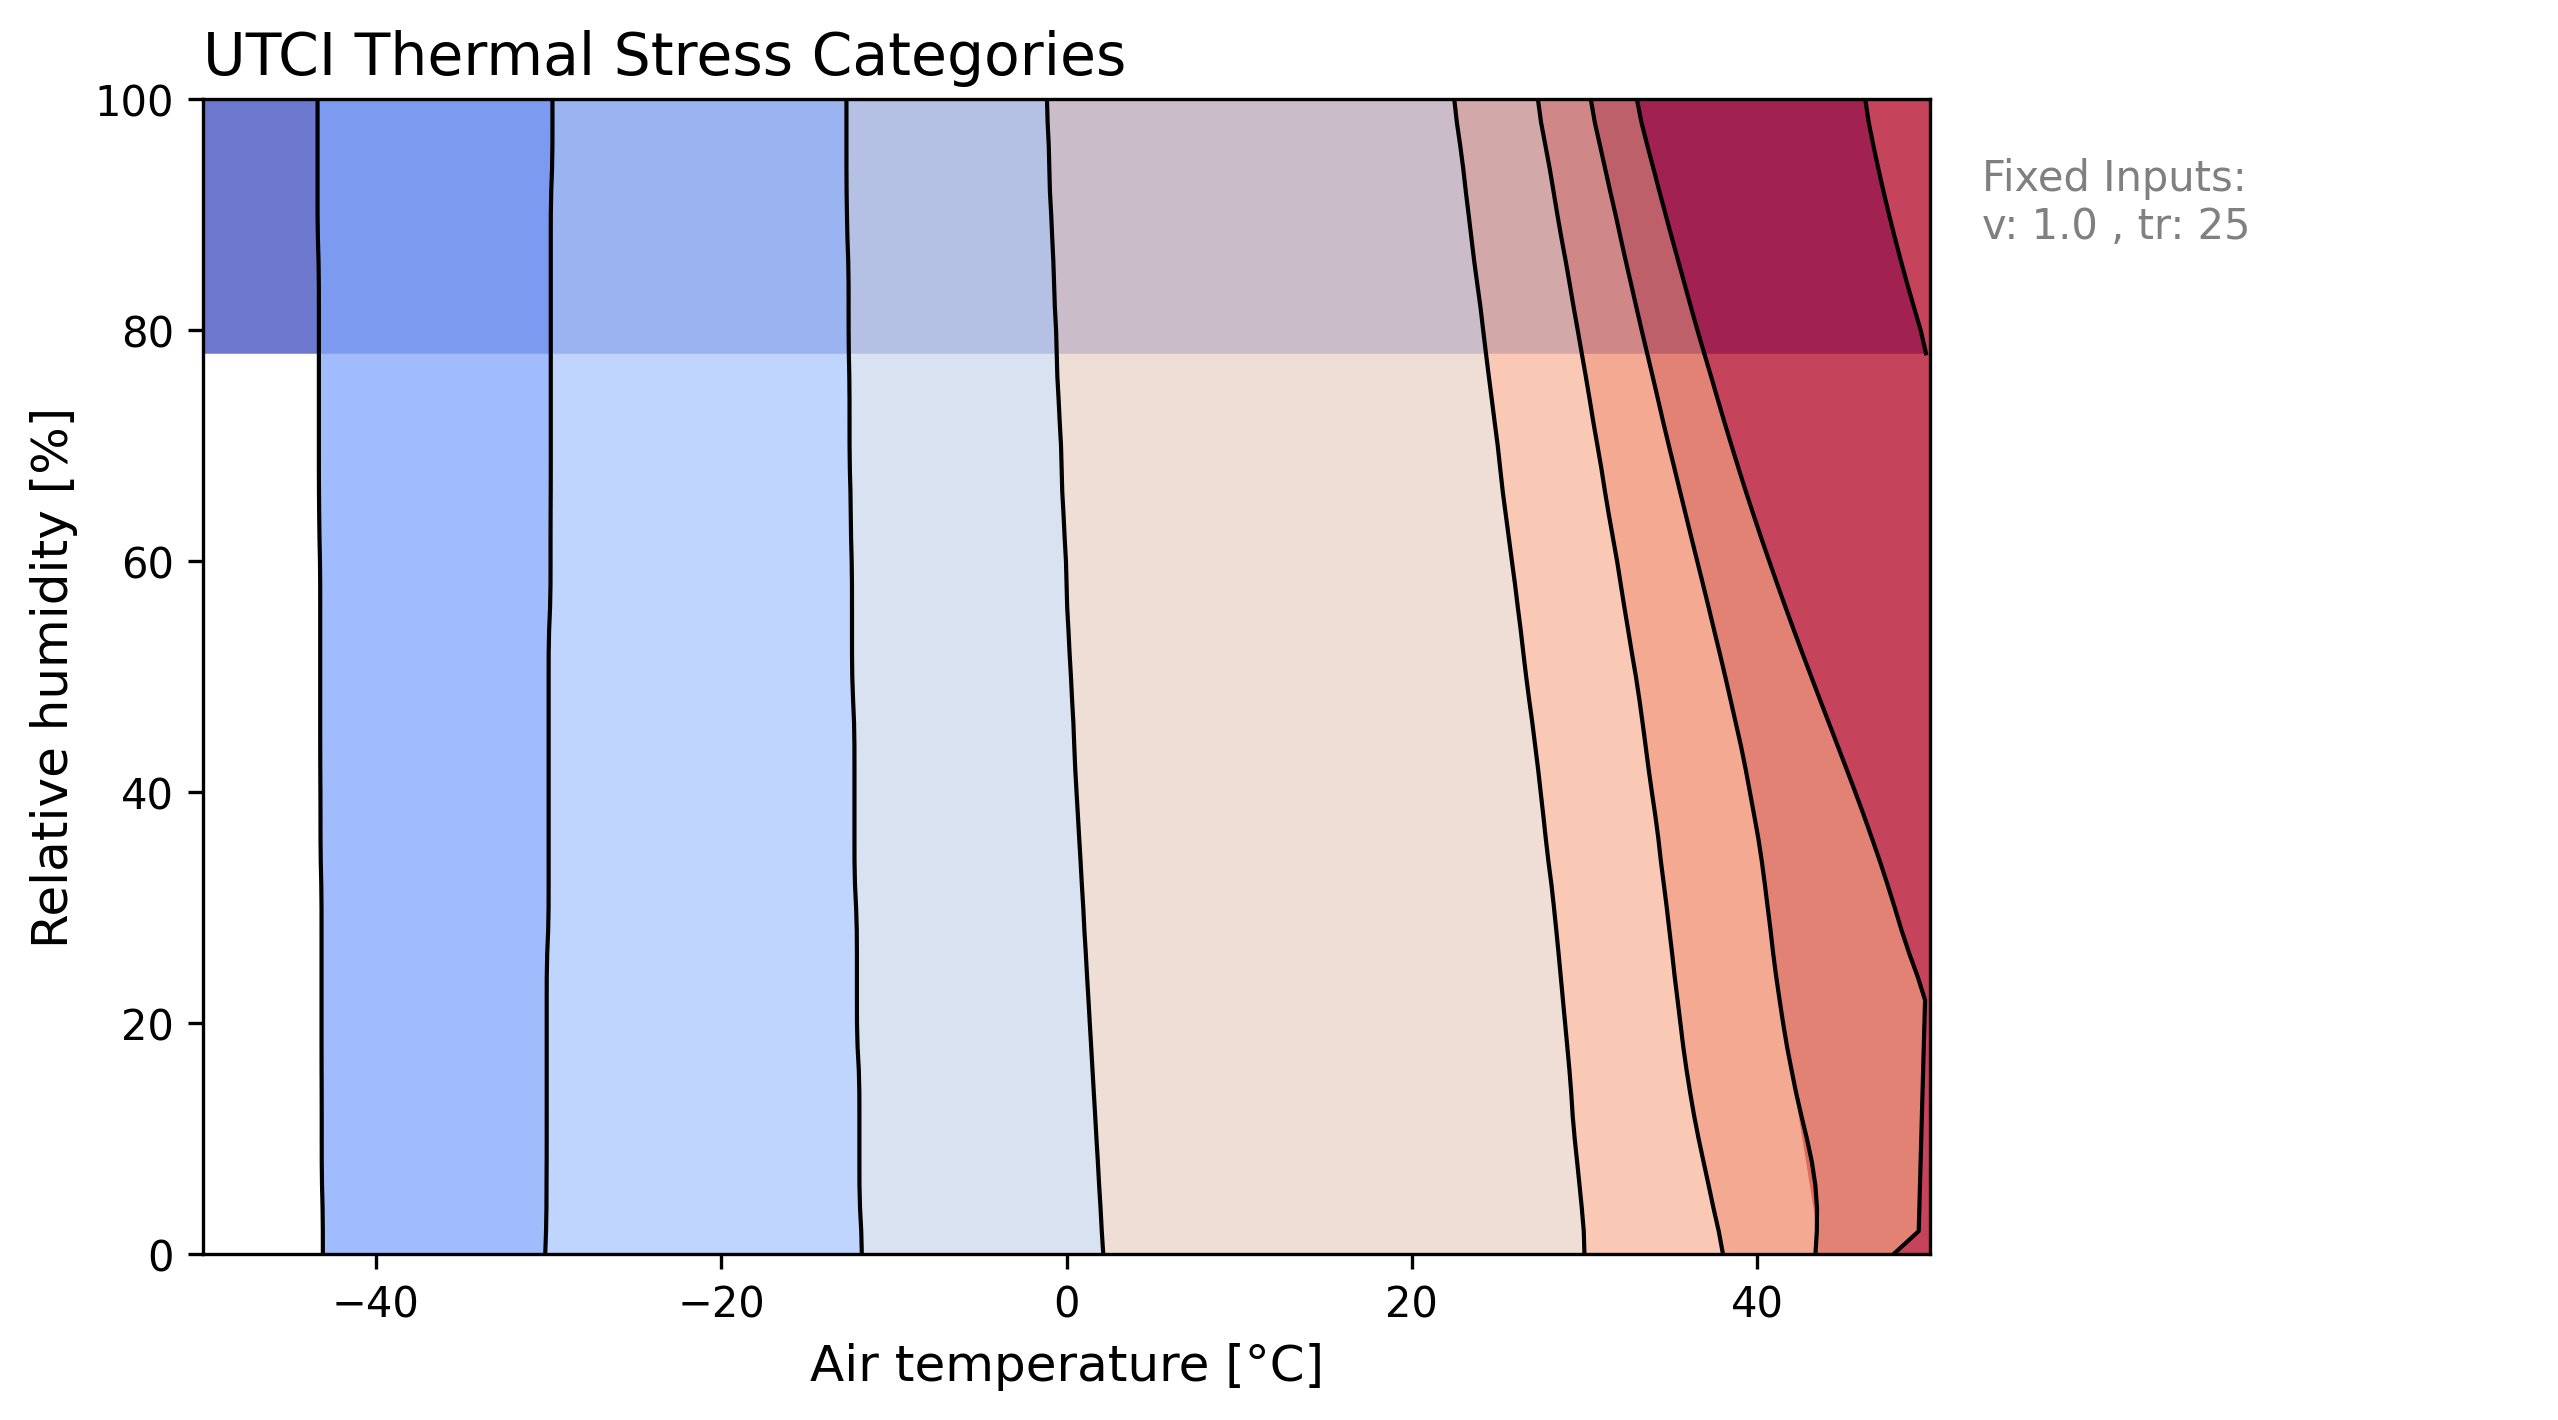

In [2]:
plot = Plot.range(utci, fixed_params={"v": 1.0, "tr": 25})
plot.style.title = "UTCI Thermal Stress Categories"
plot.style.show_legend = False
plot.style.show_fixed_params = True
fig, ax = plot.render()

## 2. Range Plot with Data Overlay

Add measurement data as scatter points on the plot.

/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/plots/scenes/range_scene.py:215: RuntimeWarning: Threshold solver: some y-values had no bracket within x_bounds (thr=-40.0: 39 point(s) unsolved, thr=-27.0: 0 point(s) unsolved, thr=-13.0: 0 point(s) unsolved, thr=0.0: 0 point(s) unsolved, thr=9.0: 0 point(s) unsolved, thr=26.0: 0 point(s) unsolved, thr=32.0: 0 point(s) unsolved, thr=38.0: 0 point(s) unsolved, thr=46.0: 9 point(s) unsolved).
  result = solve_threshold_curves(


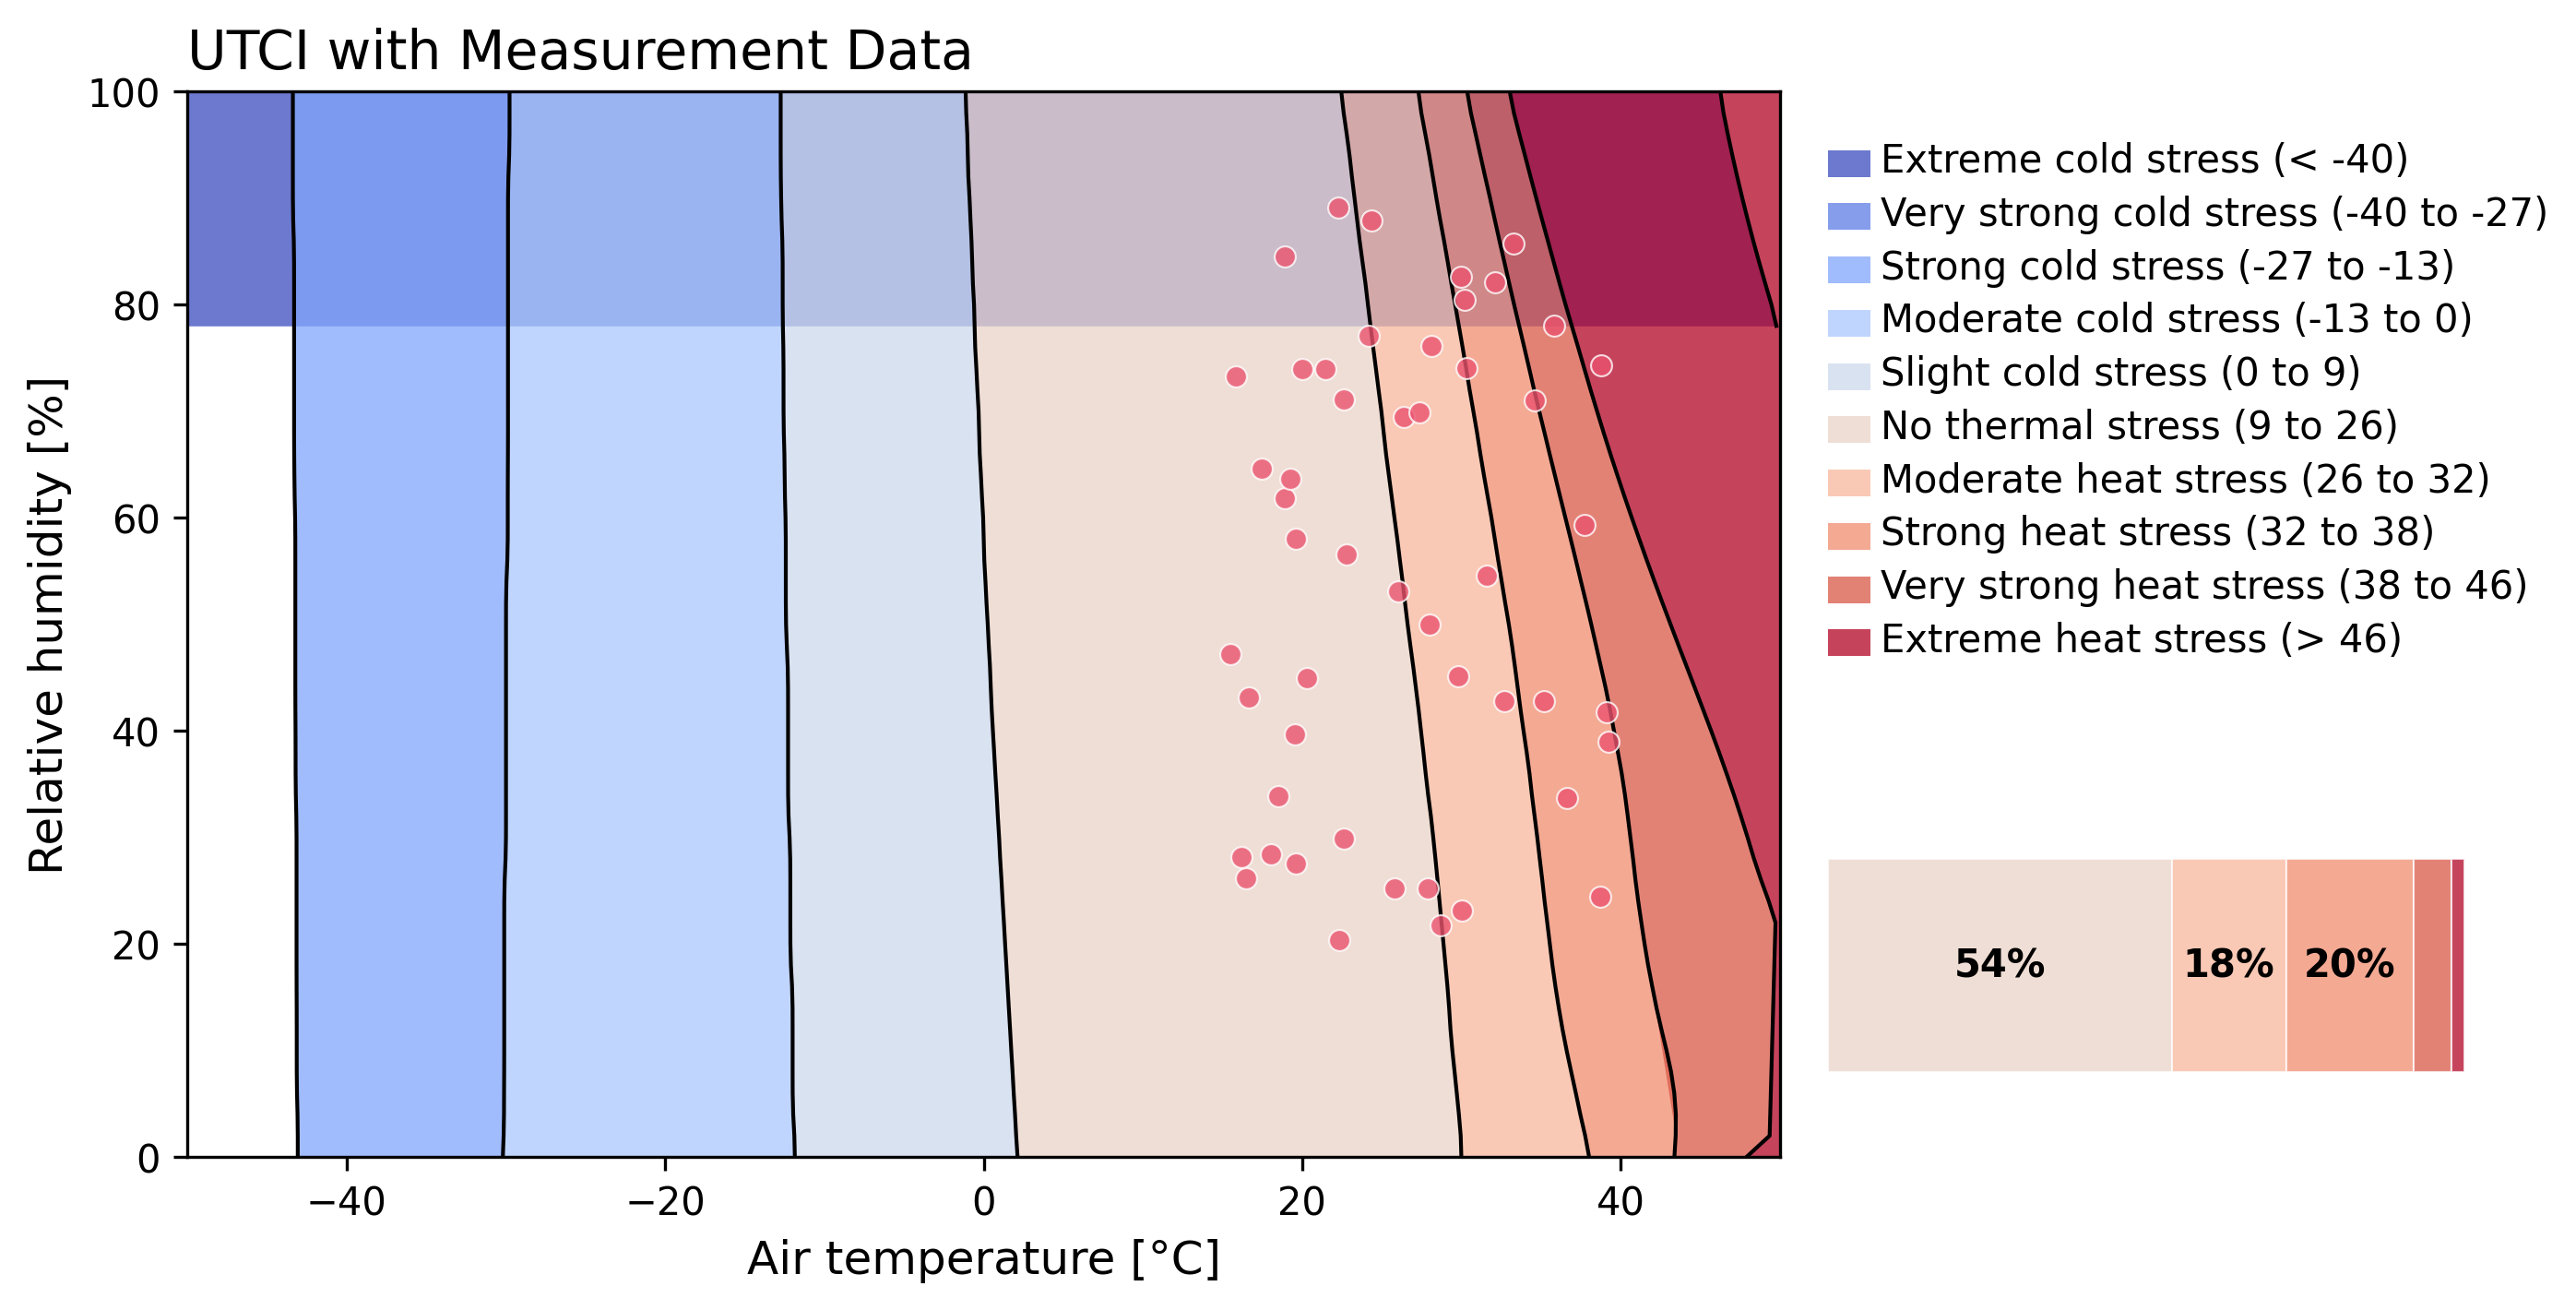

In [9]:
# Generate sample measurement data
np.random.seed(42)
temps = np.random.uniform(15, 40, 50)
rh_vals = np.random.uniform(20, 90, 50)

# Create plot and add data
plot = Plot.range(utci, fixed_params={"v": 1.0, "tr": 25})
plot = plot.add_data(temps, rh_vals)
plot.style.title = "UTCI with Measurement Data"
plot.style.show_summary = True
plot.style.show_fixed_params = False
plot.style.summary_bar_height = 0.2  # Adjusted height
plot.style.summary_bar_width = 1.2    # Adjusted vertical position
plot.style.font_sizes = {"summary": 10}  # Smaller font for info panel
fig, ax = plot.render()

## 3. Range Plot with Summary Distribution

Enable the summary subplot to show category distribution percentages.

/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/plots/scenes/range_scene.py:215: RuntimeWarning: Threshold solver: some y-values had no bracket within x_bounds (thr=-40.0: 39 point(s) unsolved, thr=-27.0: 0 point(s) unsolved, thr=-13.0: 0 point(s) unsolved, thr=0.0: 0 point(s) unsolved, thr=9.0: 0 point(s) unsolved, thr=26.0: 0 point(s) unsolved, thr=32.0: 0 point(s) unsolved, thr=38.0: 0 point(s) unsolved, thr=46.0: 9 point(s) unsolved).
  result = solve_threshold_curves(


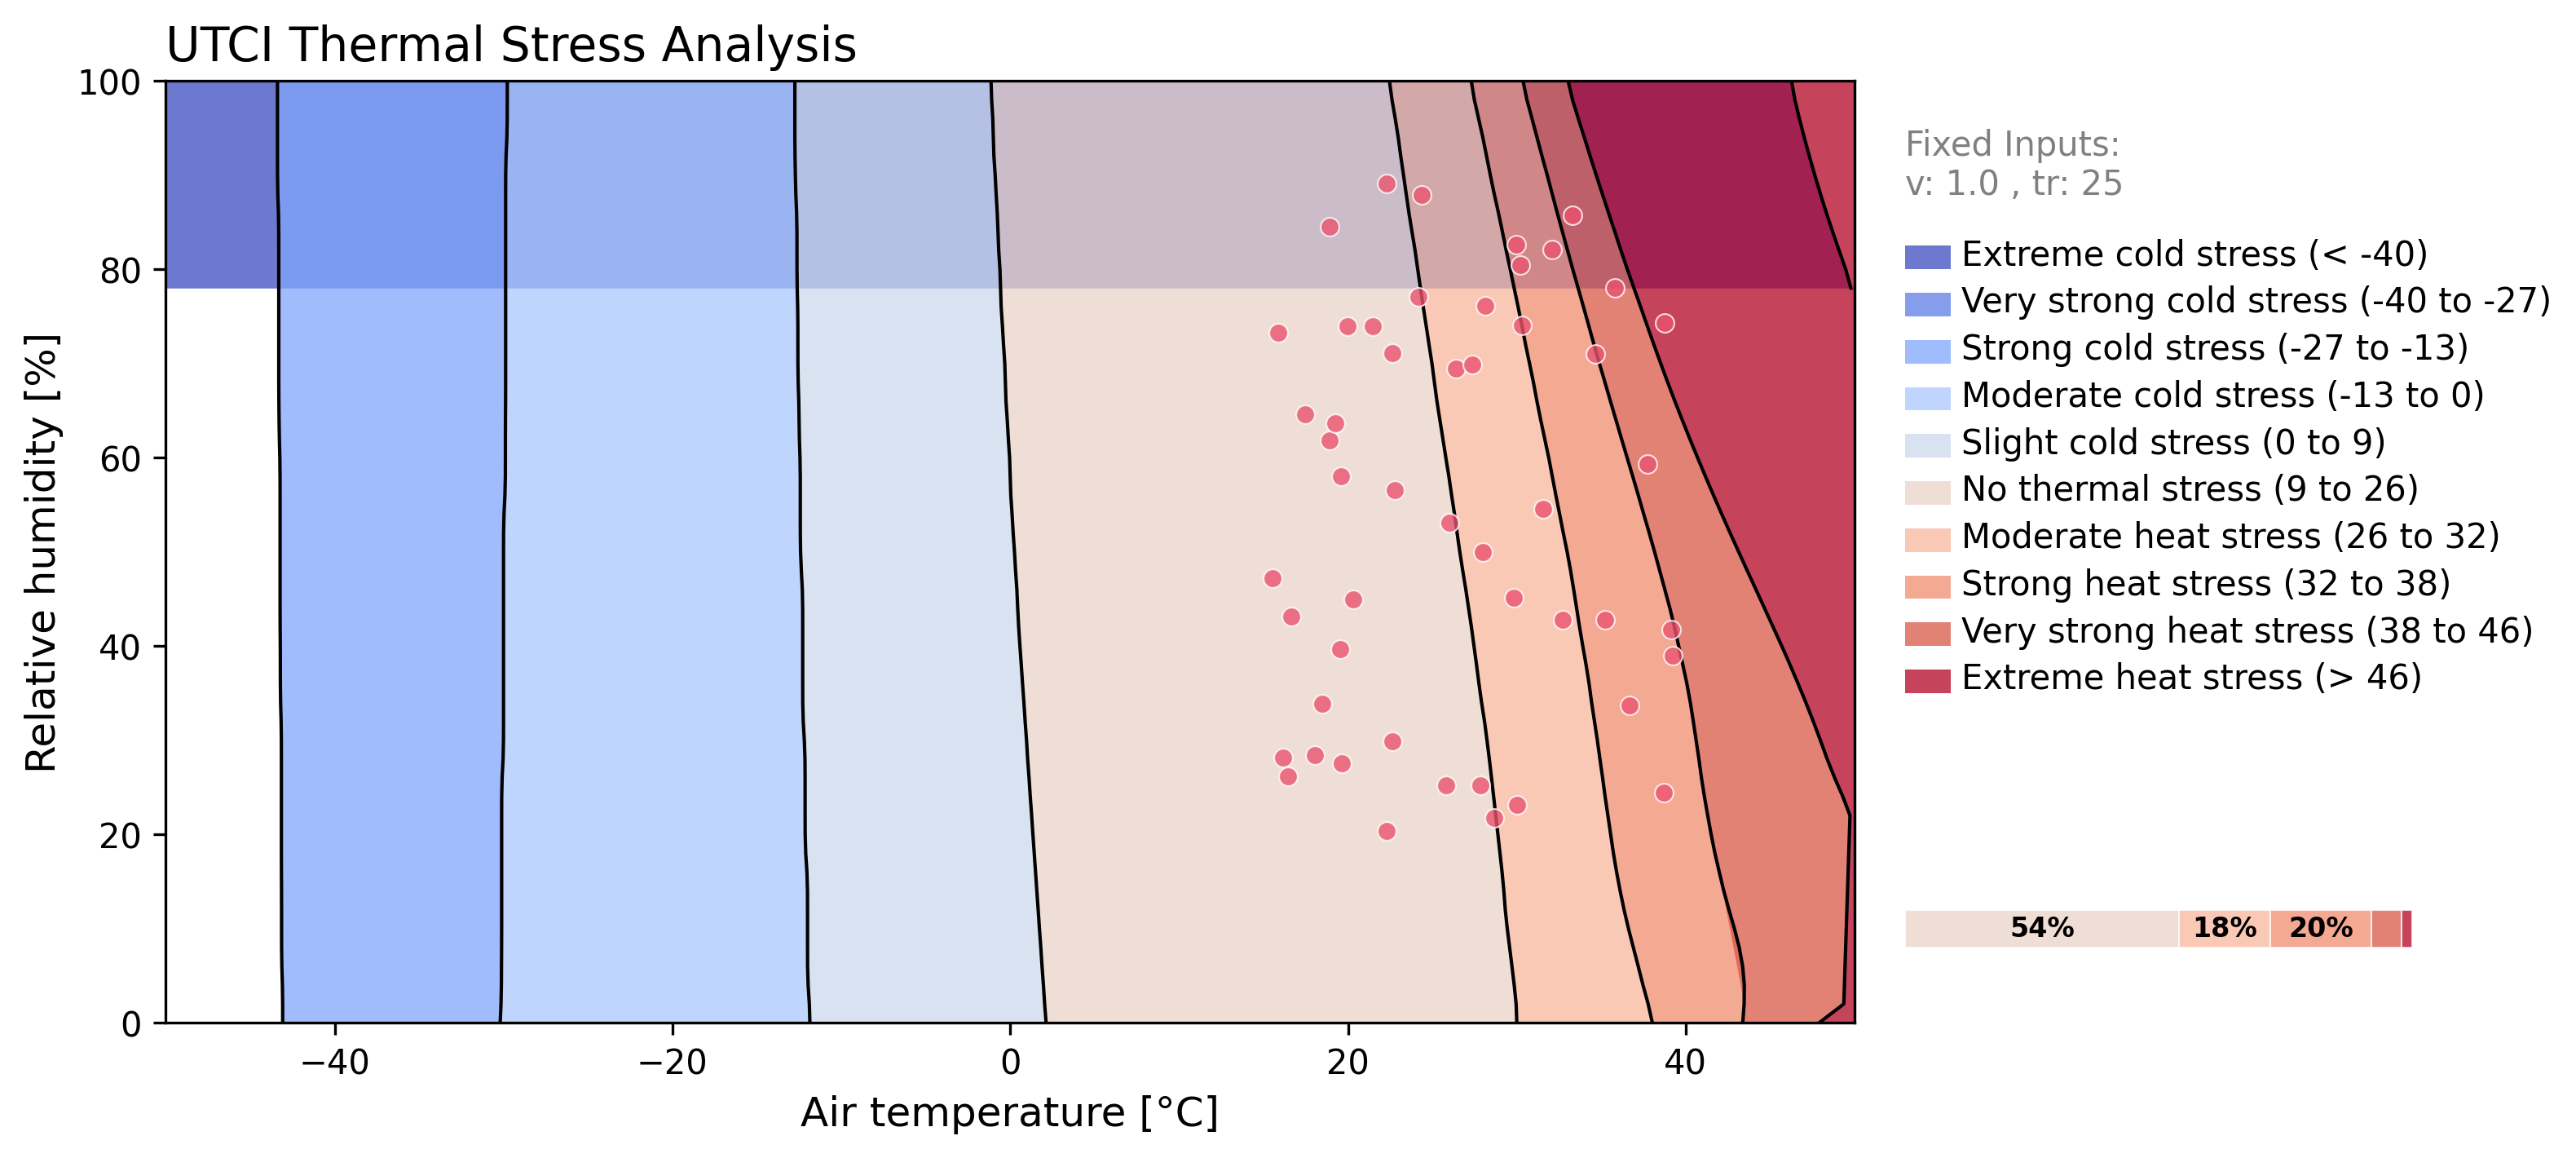

In [14]:
plot = Plot.range(utci, fixed_params={"v": 1.0, "tr": 25})
plot = plot.add_data(temps, rh_vals)
plot.style.title = "UTCI Thermal Stress Analysis"
plot.style.show_summary = True
plot.style.figsize = (12, 5)
fig, axes = plot.render()

## 4. Adaptive Comfort Model

Create an ASHRAE 55 Adaptive Comfort plot with fixed axes (outdoor temp vs operative temp).

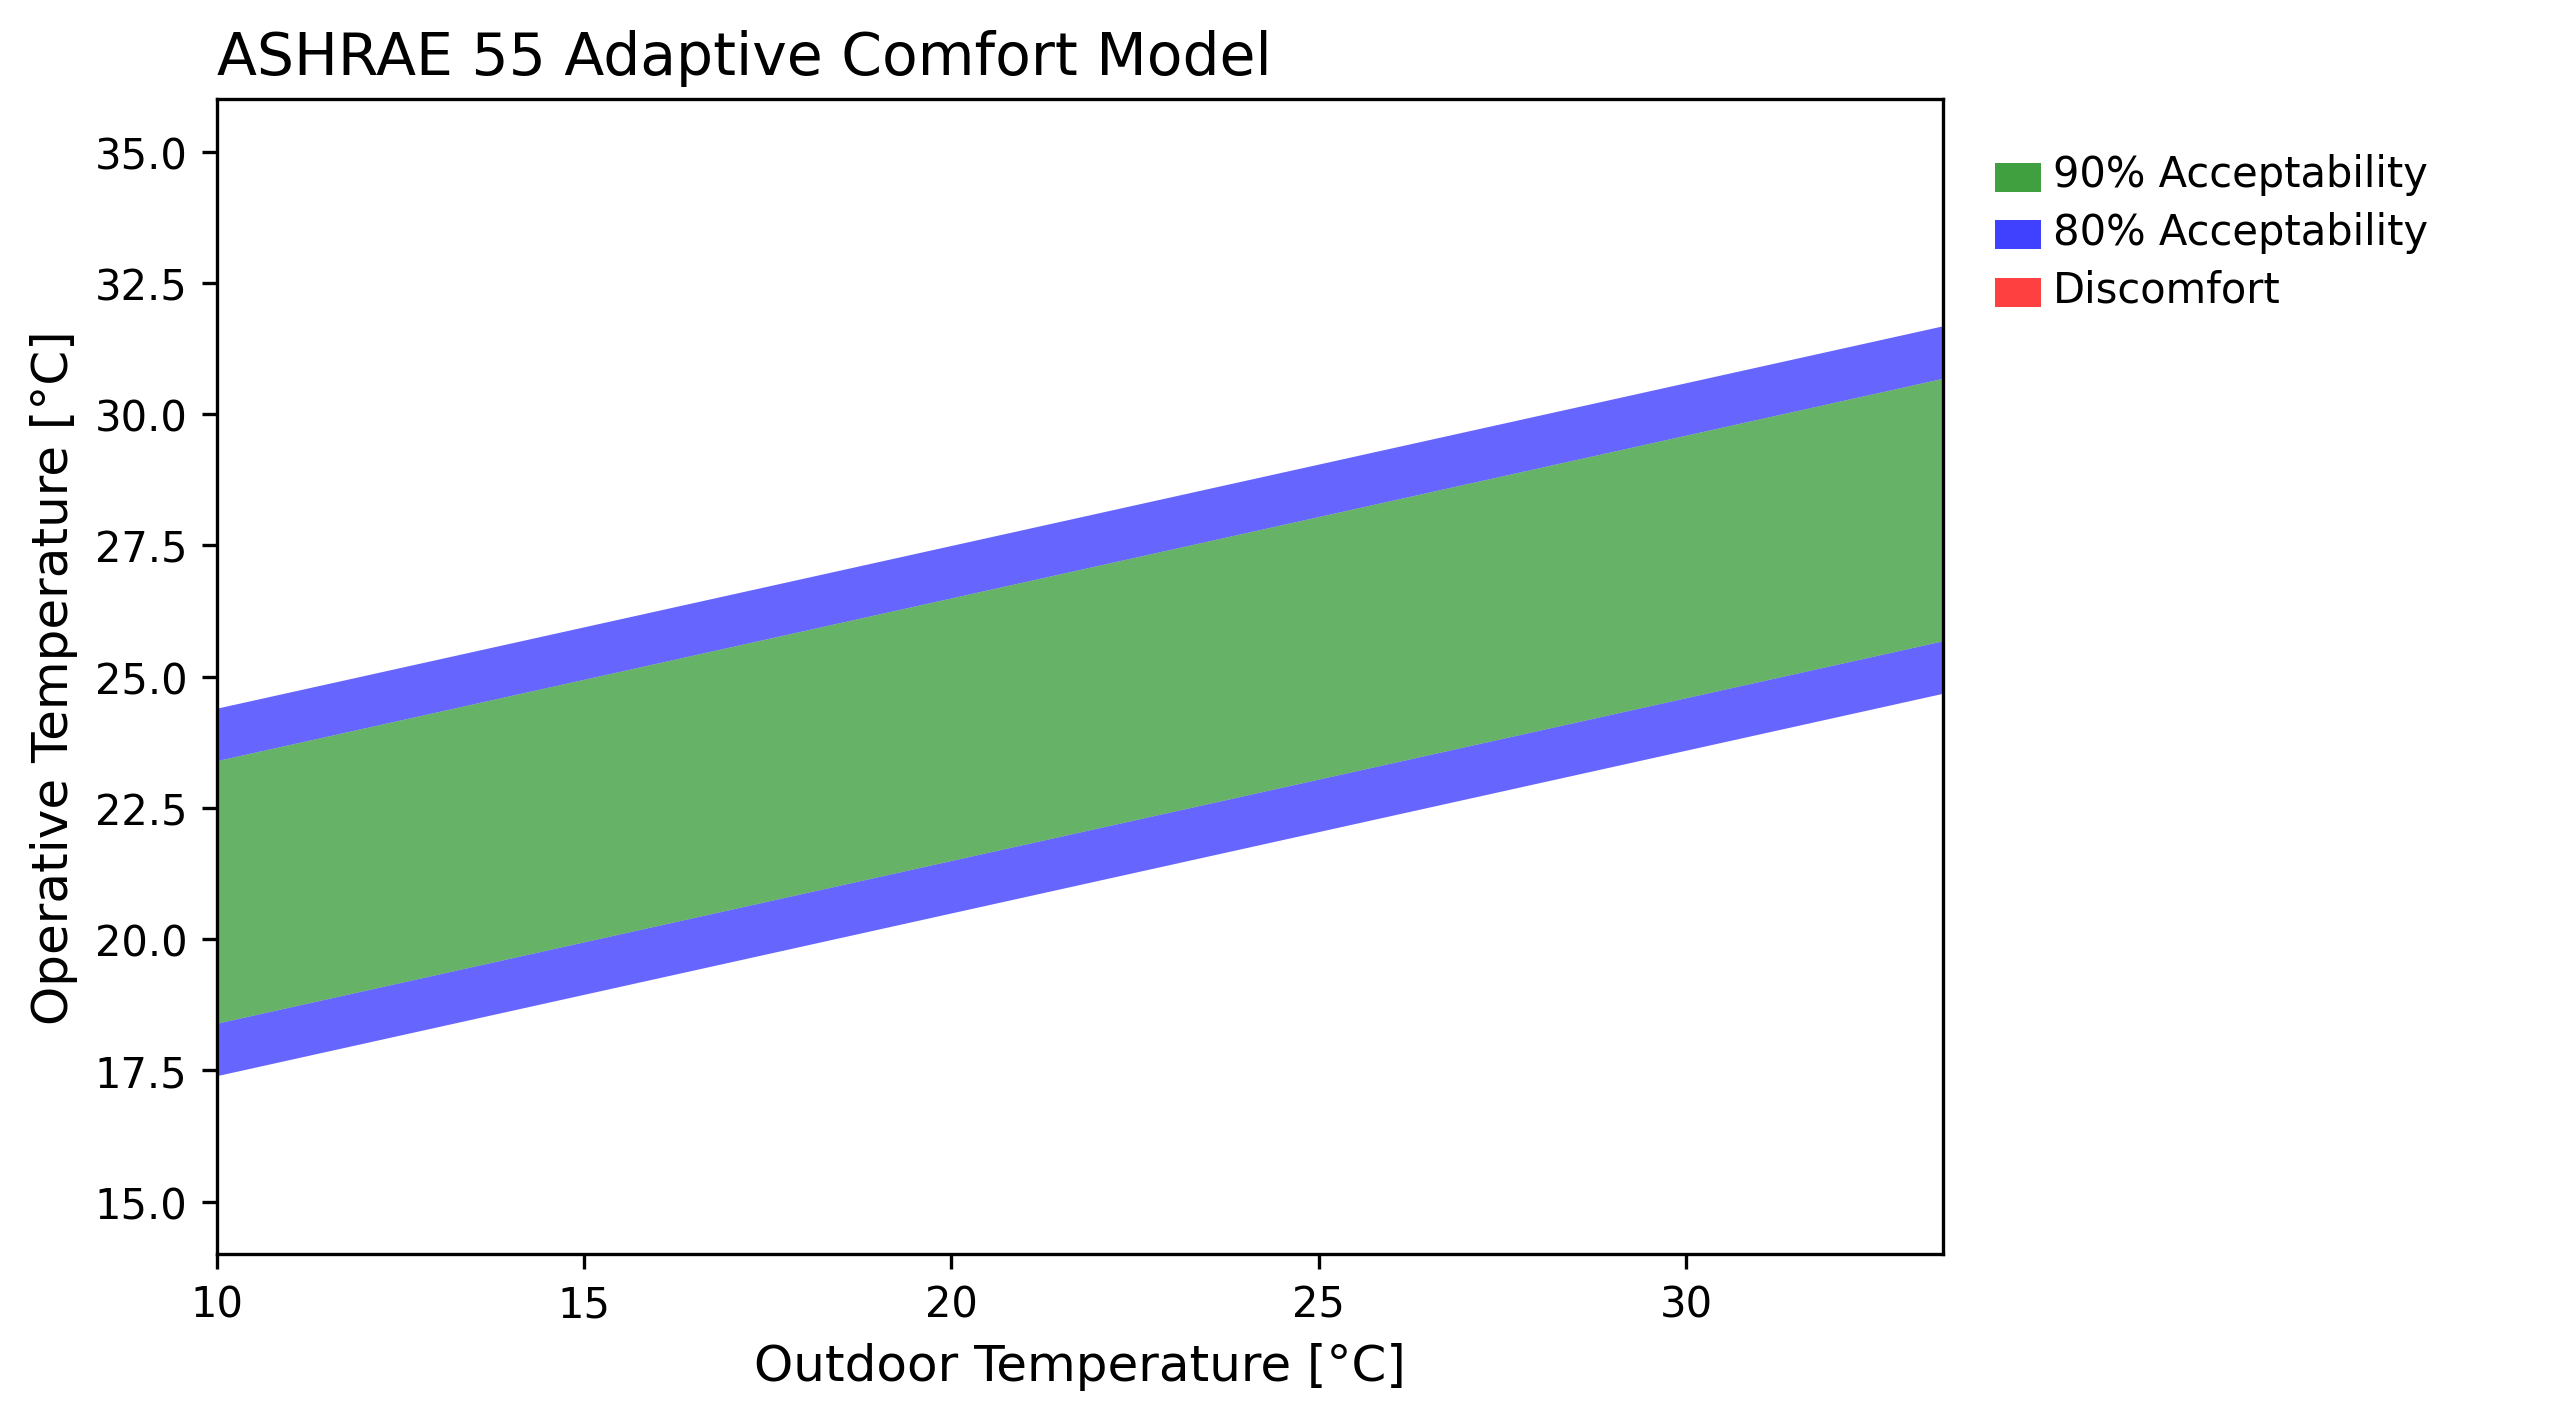

In [10]:
plot = Plot.adaptive()
plot.style.title = "ASHRAE 55 Adaptive Comfort Model"
fig, ax = plot.render()

## 5. Adaptive Comfort with Data and Summary

Overlay measurement data and show the distribution across comfort categories.

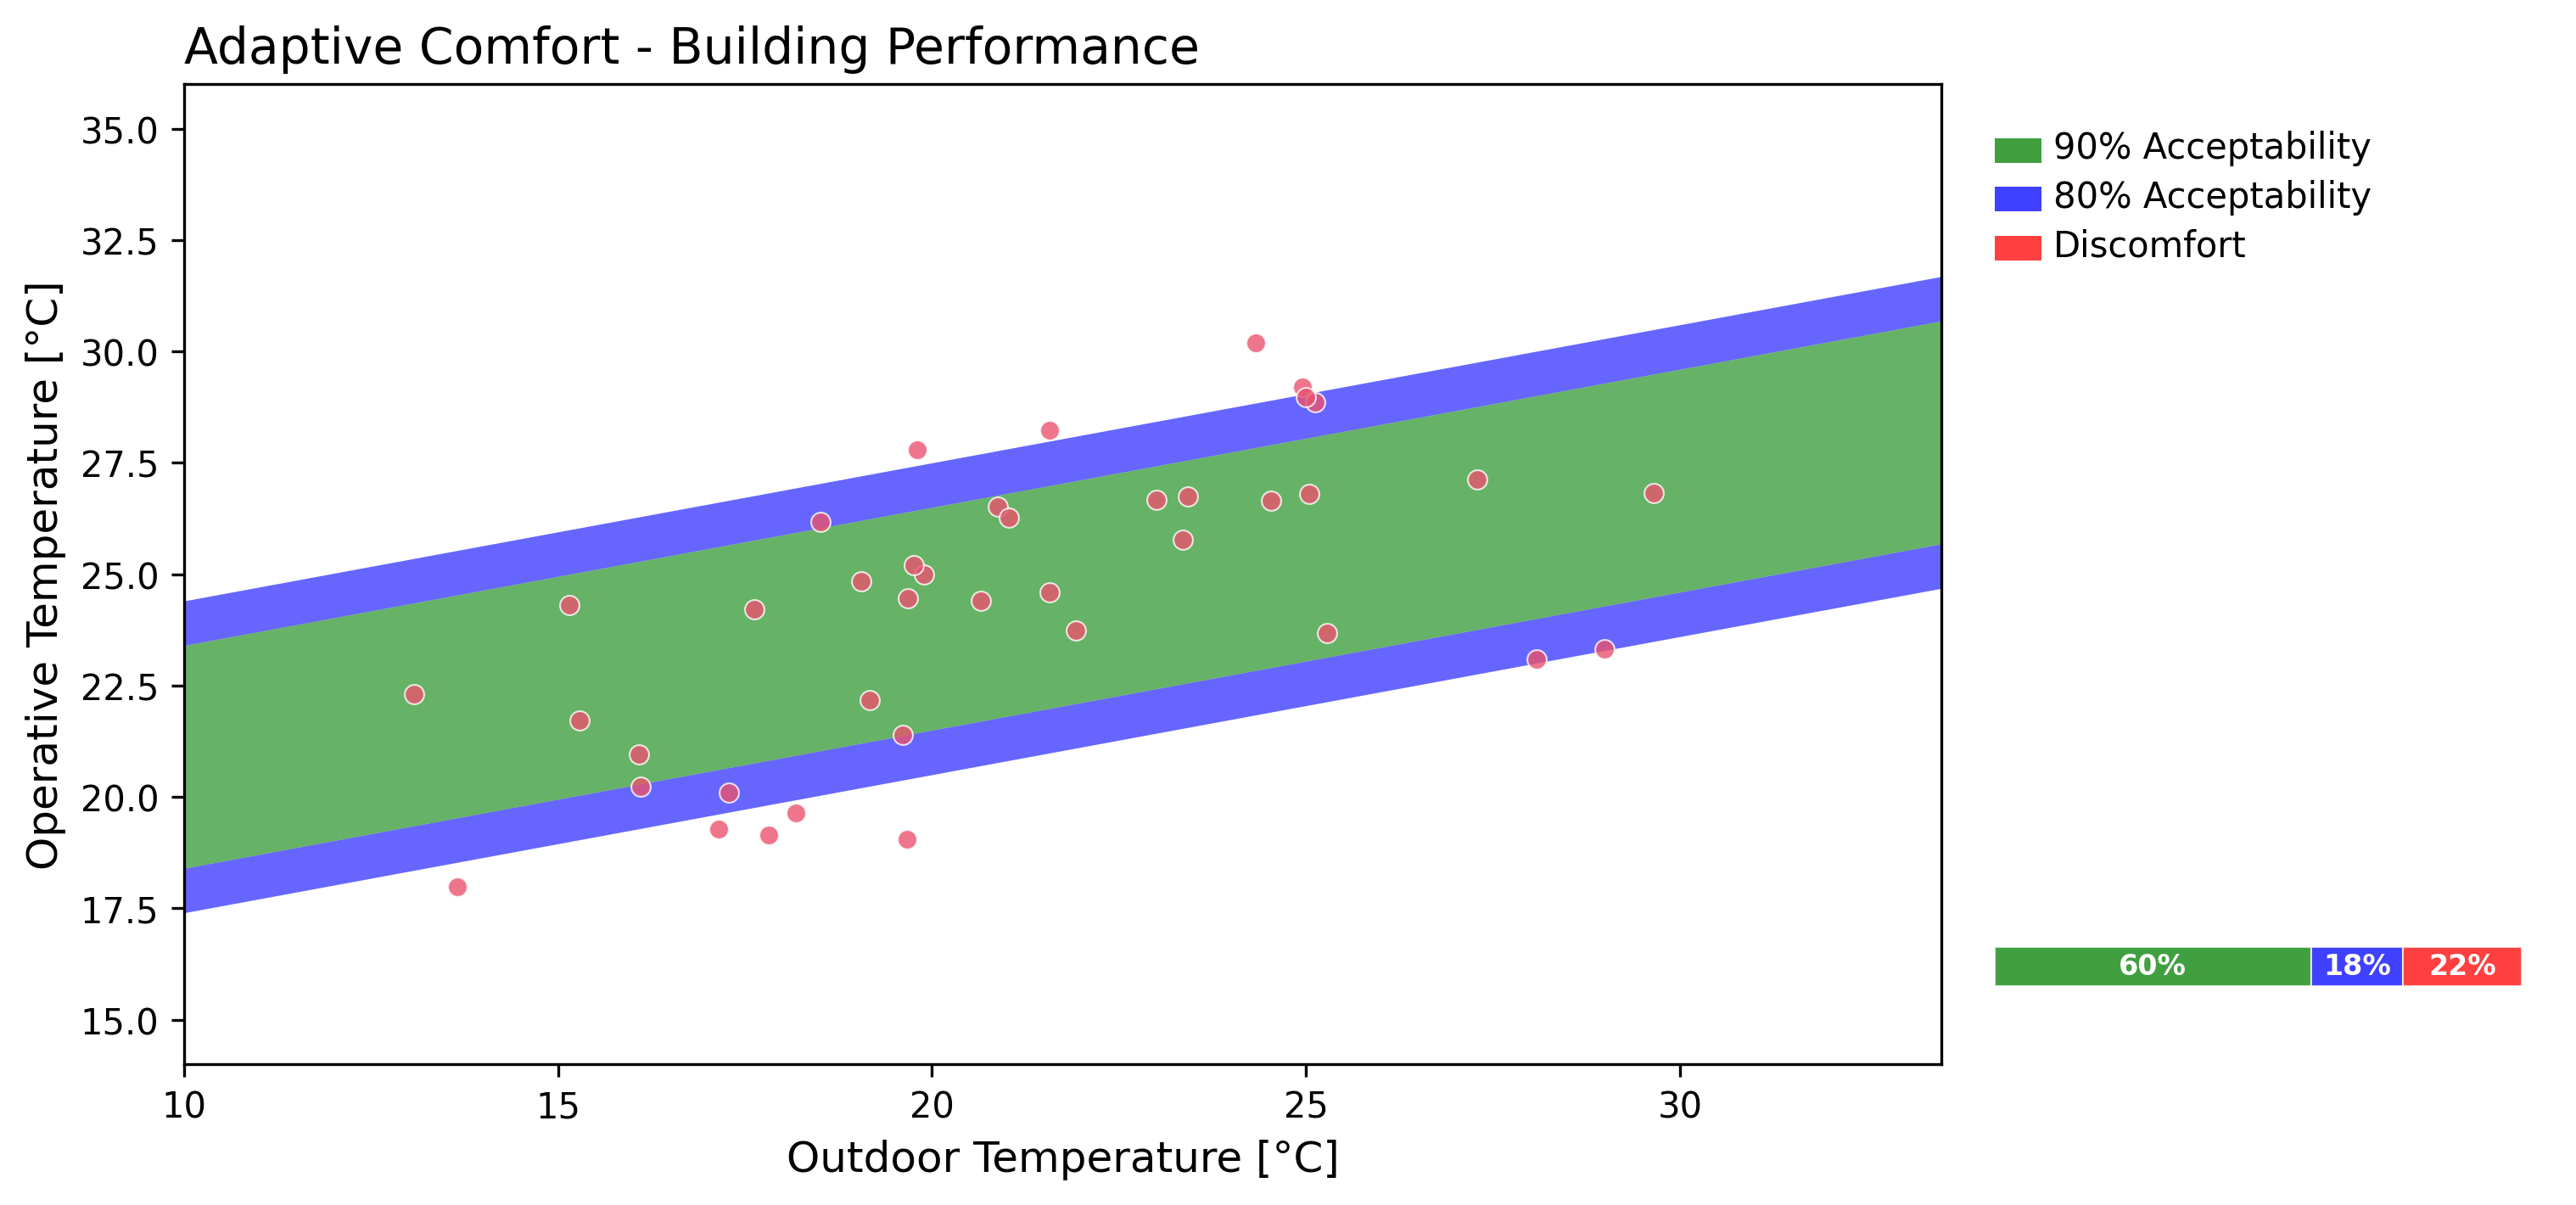

In [11]:
# Generate sample data around comfort line
np.random.seed(123)
t_outdoor = np.random.uniform(12, 30, 40)
# Comfort temp = 0.31 * t_outdoor + 17.8, add some noise
t_operative = 0.31 * t_outdoor + 17.8 + np.random.uniform(-5, 5, 40)

plot = Plot.adaptive()
plot = plot.add_data(t_outdoor, t_operative)
plot.style.title = "Adaptive Comfort - Building Performance"
plot.style.show_summary = True
plot.style.figsize = (12, 5)
fig, axes = plot.render()

## 6. PMV Thermal Comfort Plot

Create a PMV plot showing comfort zones.

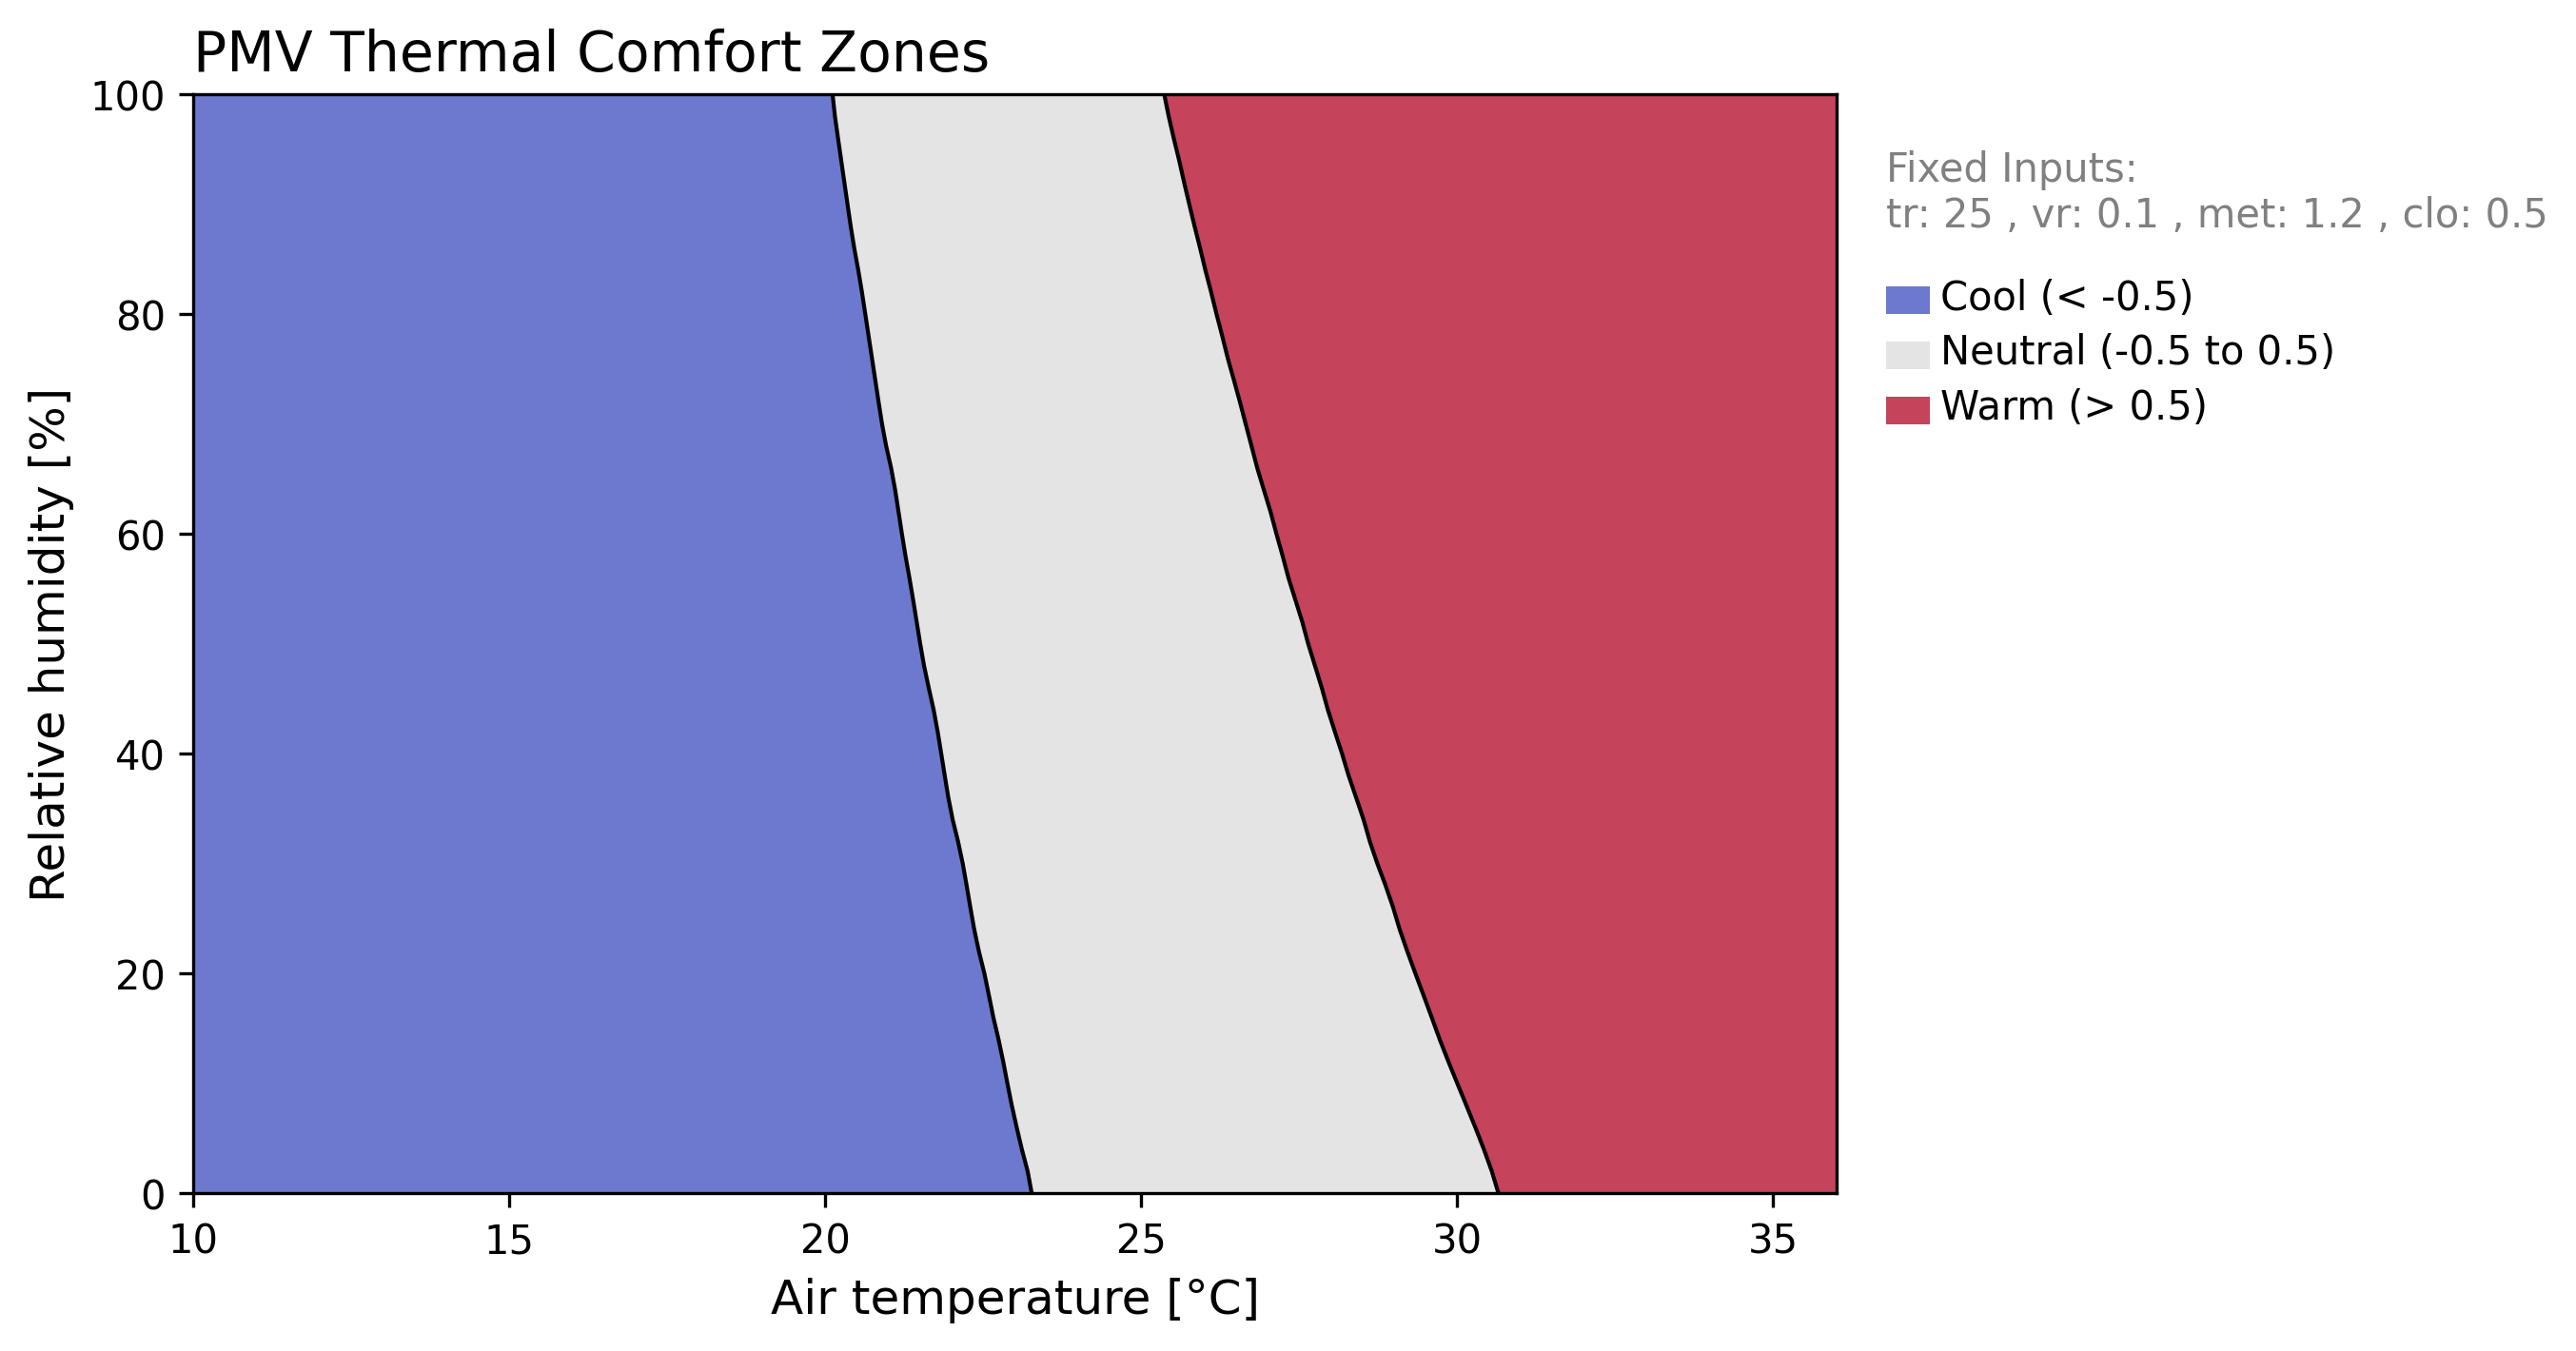

In [12]:
plot = Plot.range(
    pmv_ppd_iso,
    fixed_params={"tr": 25, "vr": 0.1, "met": 1.2, "clo": 0.5}
)
plot.style.title = "PMV Thermal Comfort Zones"
fig, ax = plot.render()

## 7. Heat Index Plot

Visualize heat index danger categories.

/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/plots/scenes/range_scene.py:215: RuntimeWarning: Threshold solver: some y-values had no bracket within x_bounds (thr=27.0: 0 point(s) unsolved, thr=32.0: 0 point(s) unsolved, thr=41.0: 0 point(s) unsolved, thr=54.0: 9 point(s) unsolved).
  result = solve_threshold_curves(


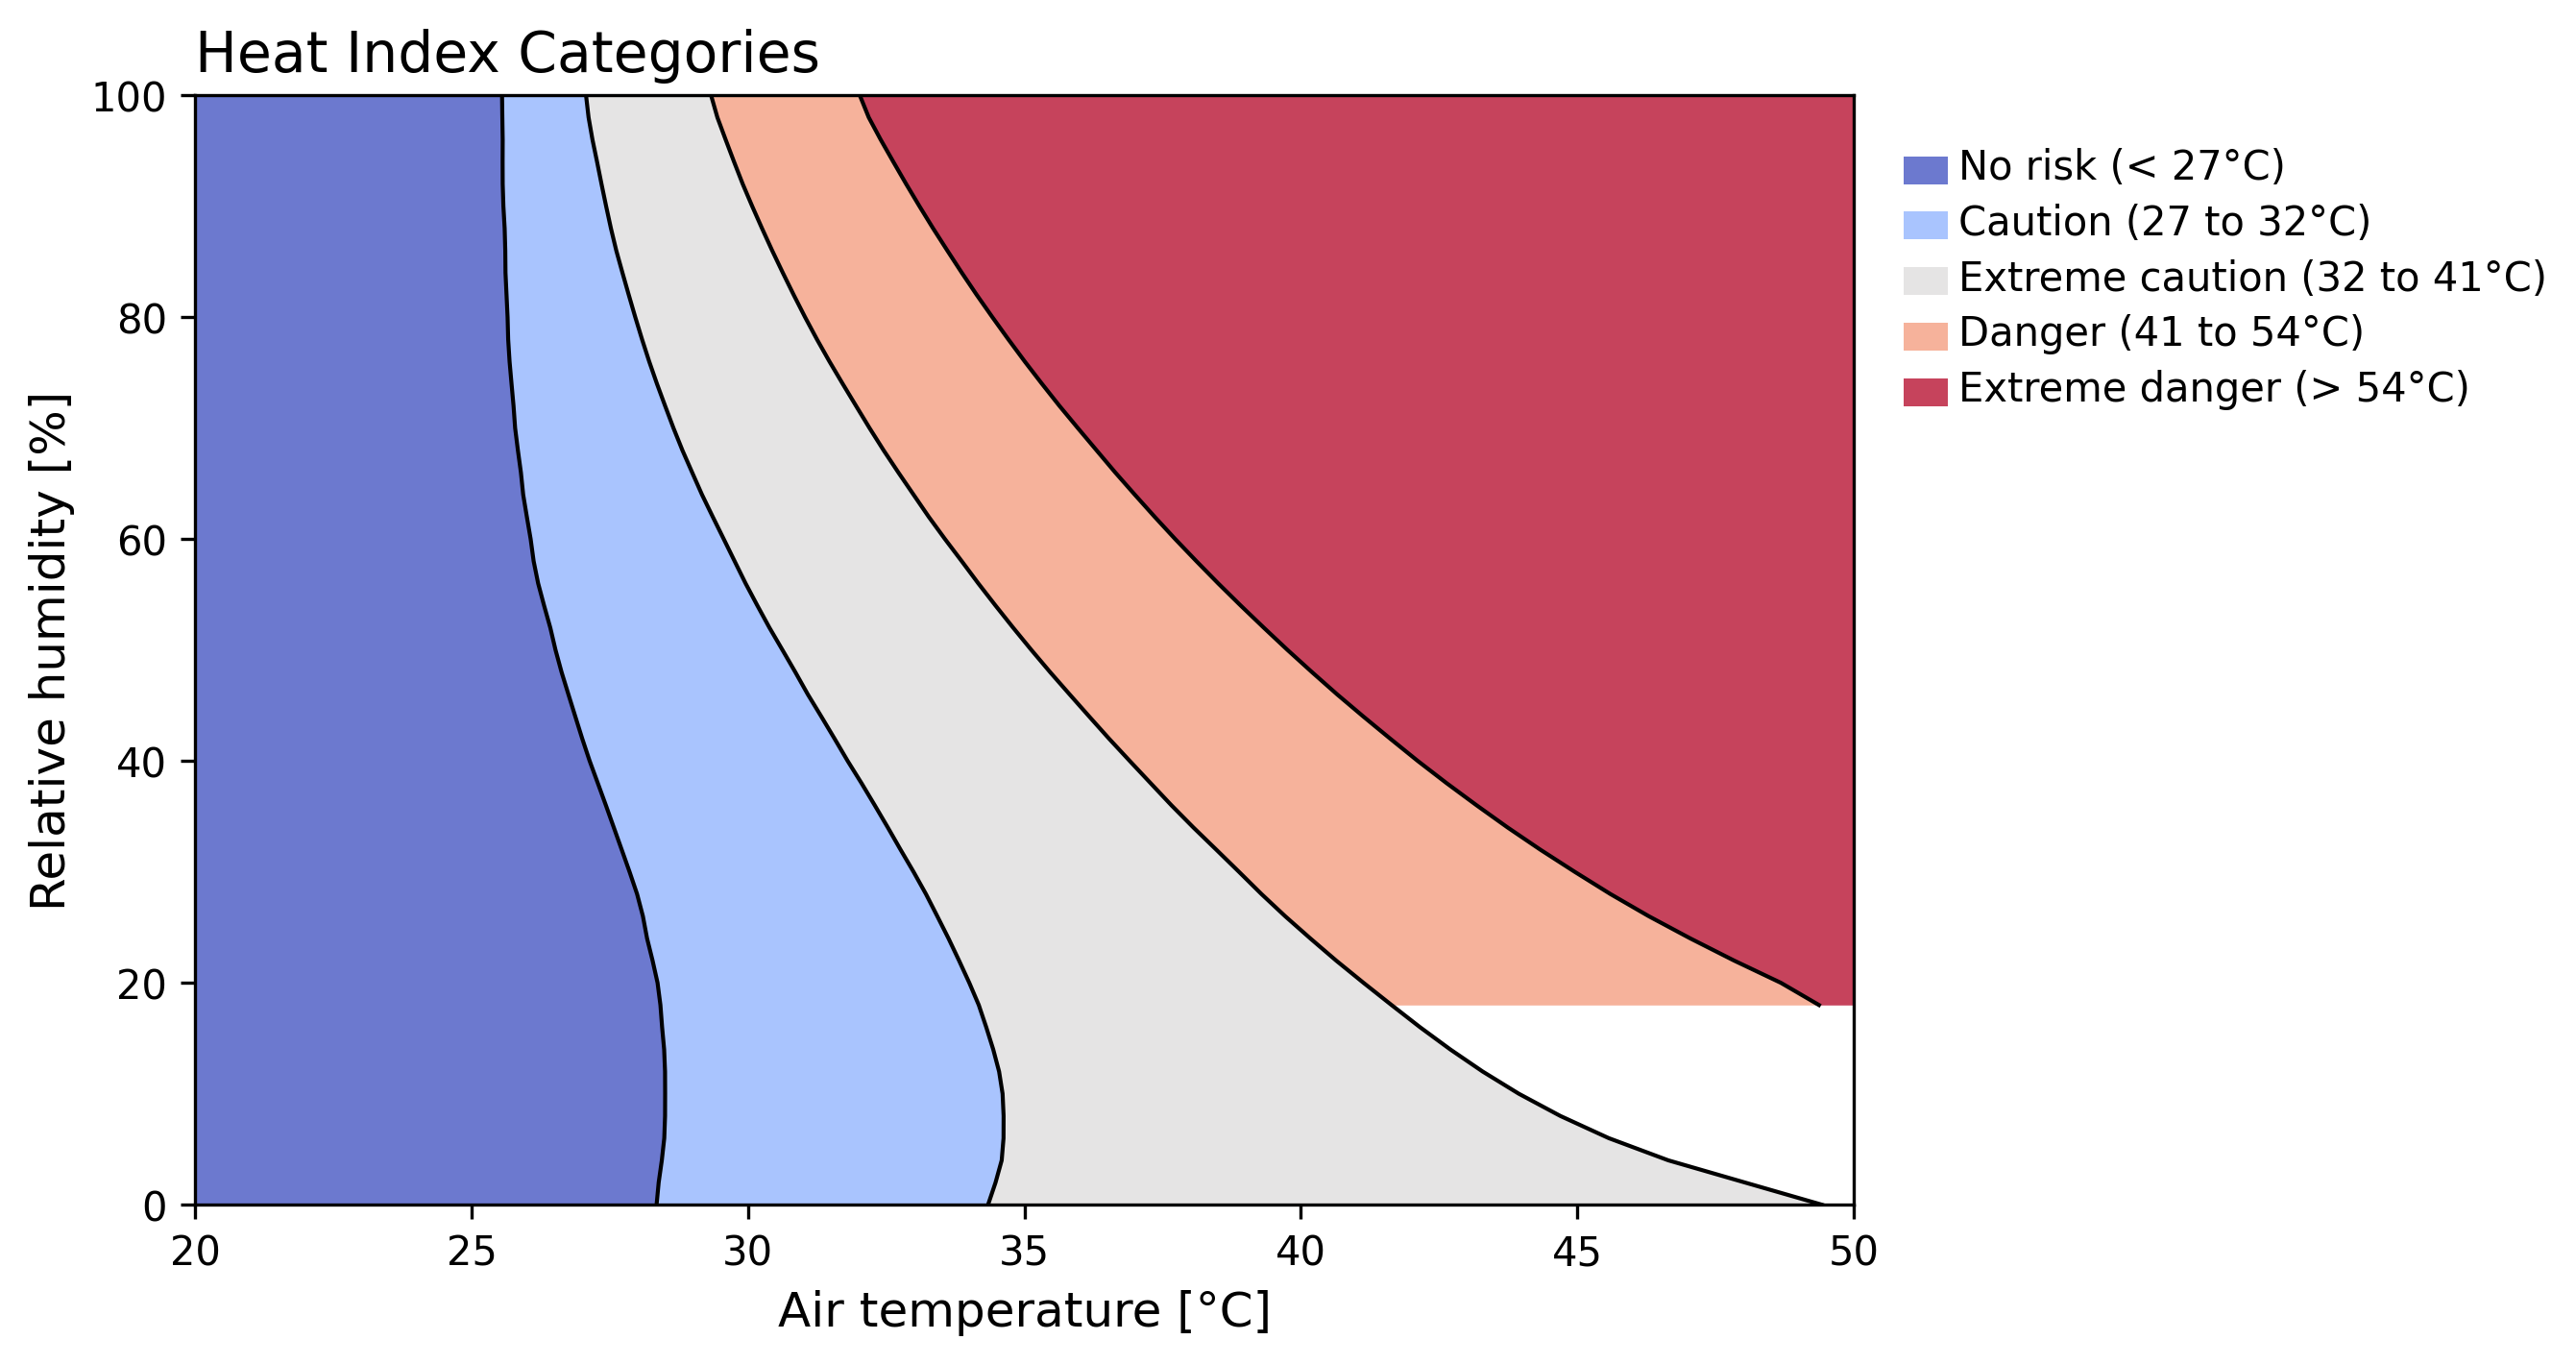

In [13]:
plot = Plot.range(heat_index_rothfusz)
plot.style.title = "Heat Index Categories"
fig, ax = plot.render()

## 8. Custom X/Y Parameters

Use different model parameters for x and y axes. Here we plot PMV with metabolic rate on the y-axis instead of relative humidity.

/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/plots/scenes/range_scene.py:215: RuntimeWarning: Threshold solver: some y-values had no bracket within x_bounds (thr=-0.5: 11 point(s) unsolved, thr=0.5: 0 point(s) unsolved).
  result = solve_threshold_curves(


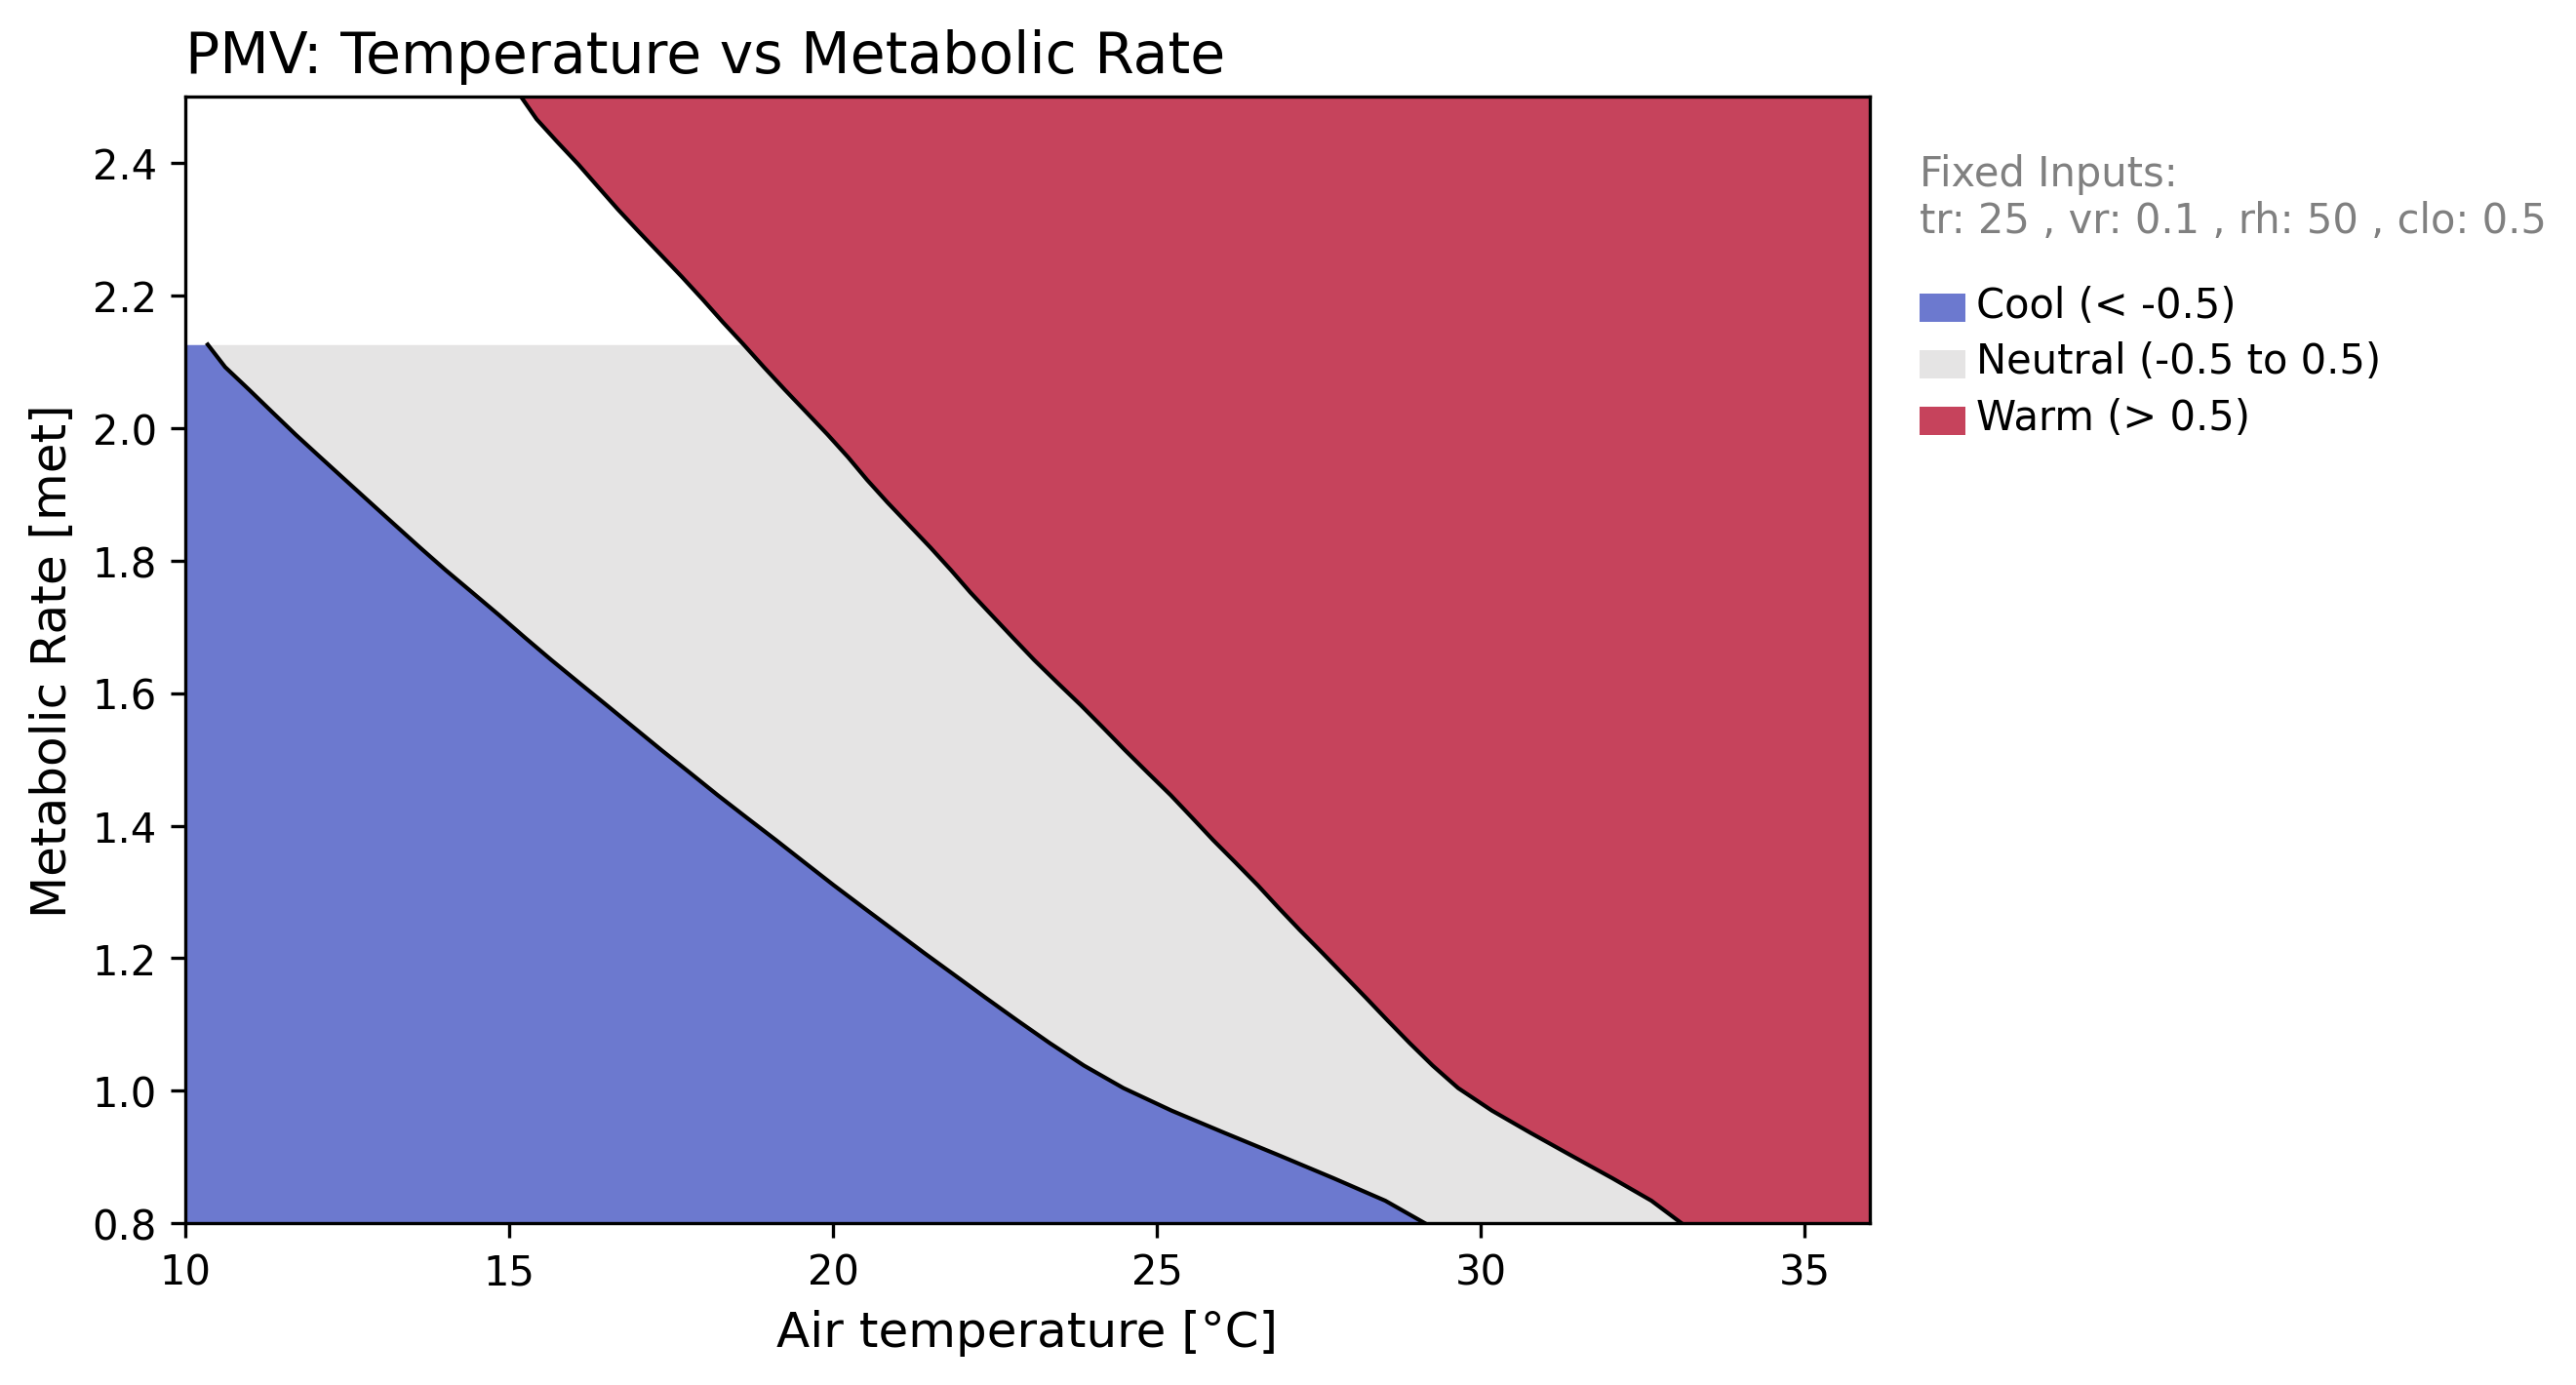

In [14]:
plot = Plot.range(
    pmv_ppd_iso,
    x_param="tdb",
    y_param="met",
    fixed_params={"tr": 25, "vr": 0.1, "rh": 50, "clo": 0.5},
    y_range=(0.8, 2.5),
)
plot.style.title = "PMV: Temperature vs Metabolic Rate"
plot.style.ylabel = "Metabolic Rate [met]"
fig, ax = plot.render()

## 9. Style Customization

Customize the visual appearance using the Style object.

/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/plots/scenes/range_scene.py:215: RuntimeWarning: Threshold solver: some y-values had no bracket within x_bounds (thr=-40.0: 40 point(s) unsolved, thr=-27.0: 0 point(s) unsolved, thr=-13.0: 0 point(s) unsolved, thr=0.0: 0 point(s) unsolved, thr=9.0: 0 point(s) unsolved, thr=26.0: 0 point(s) unsolved, thr=32.0: 0 point(s) unsolved, thr=38.0: 0 point(s) unsolved, thr=46.0: 9 point(s) unsolved).
  result = solve_threshold_curves(


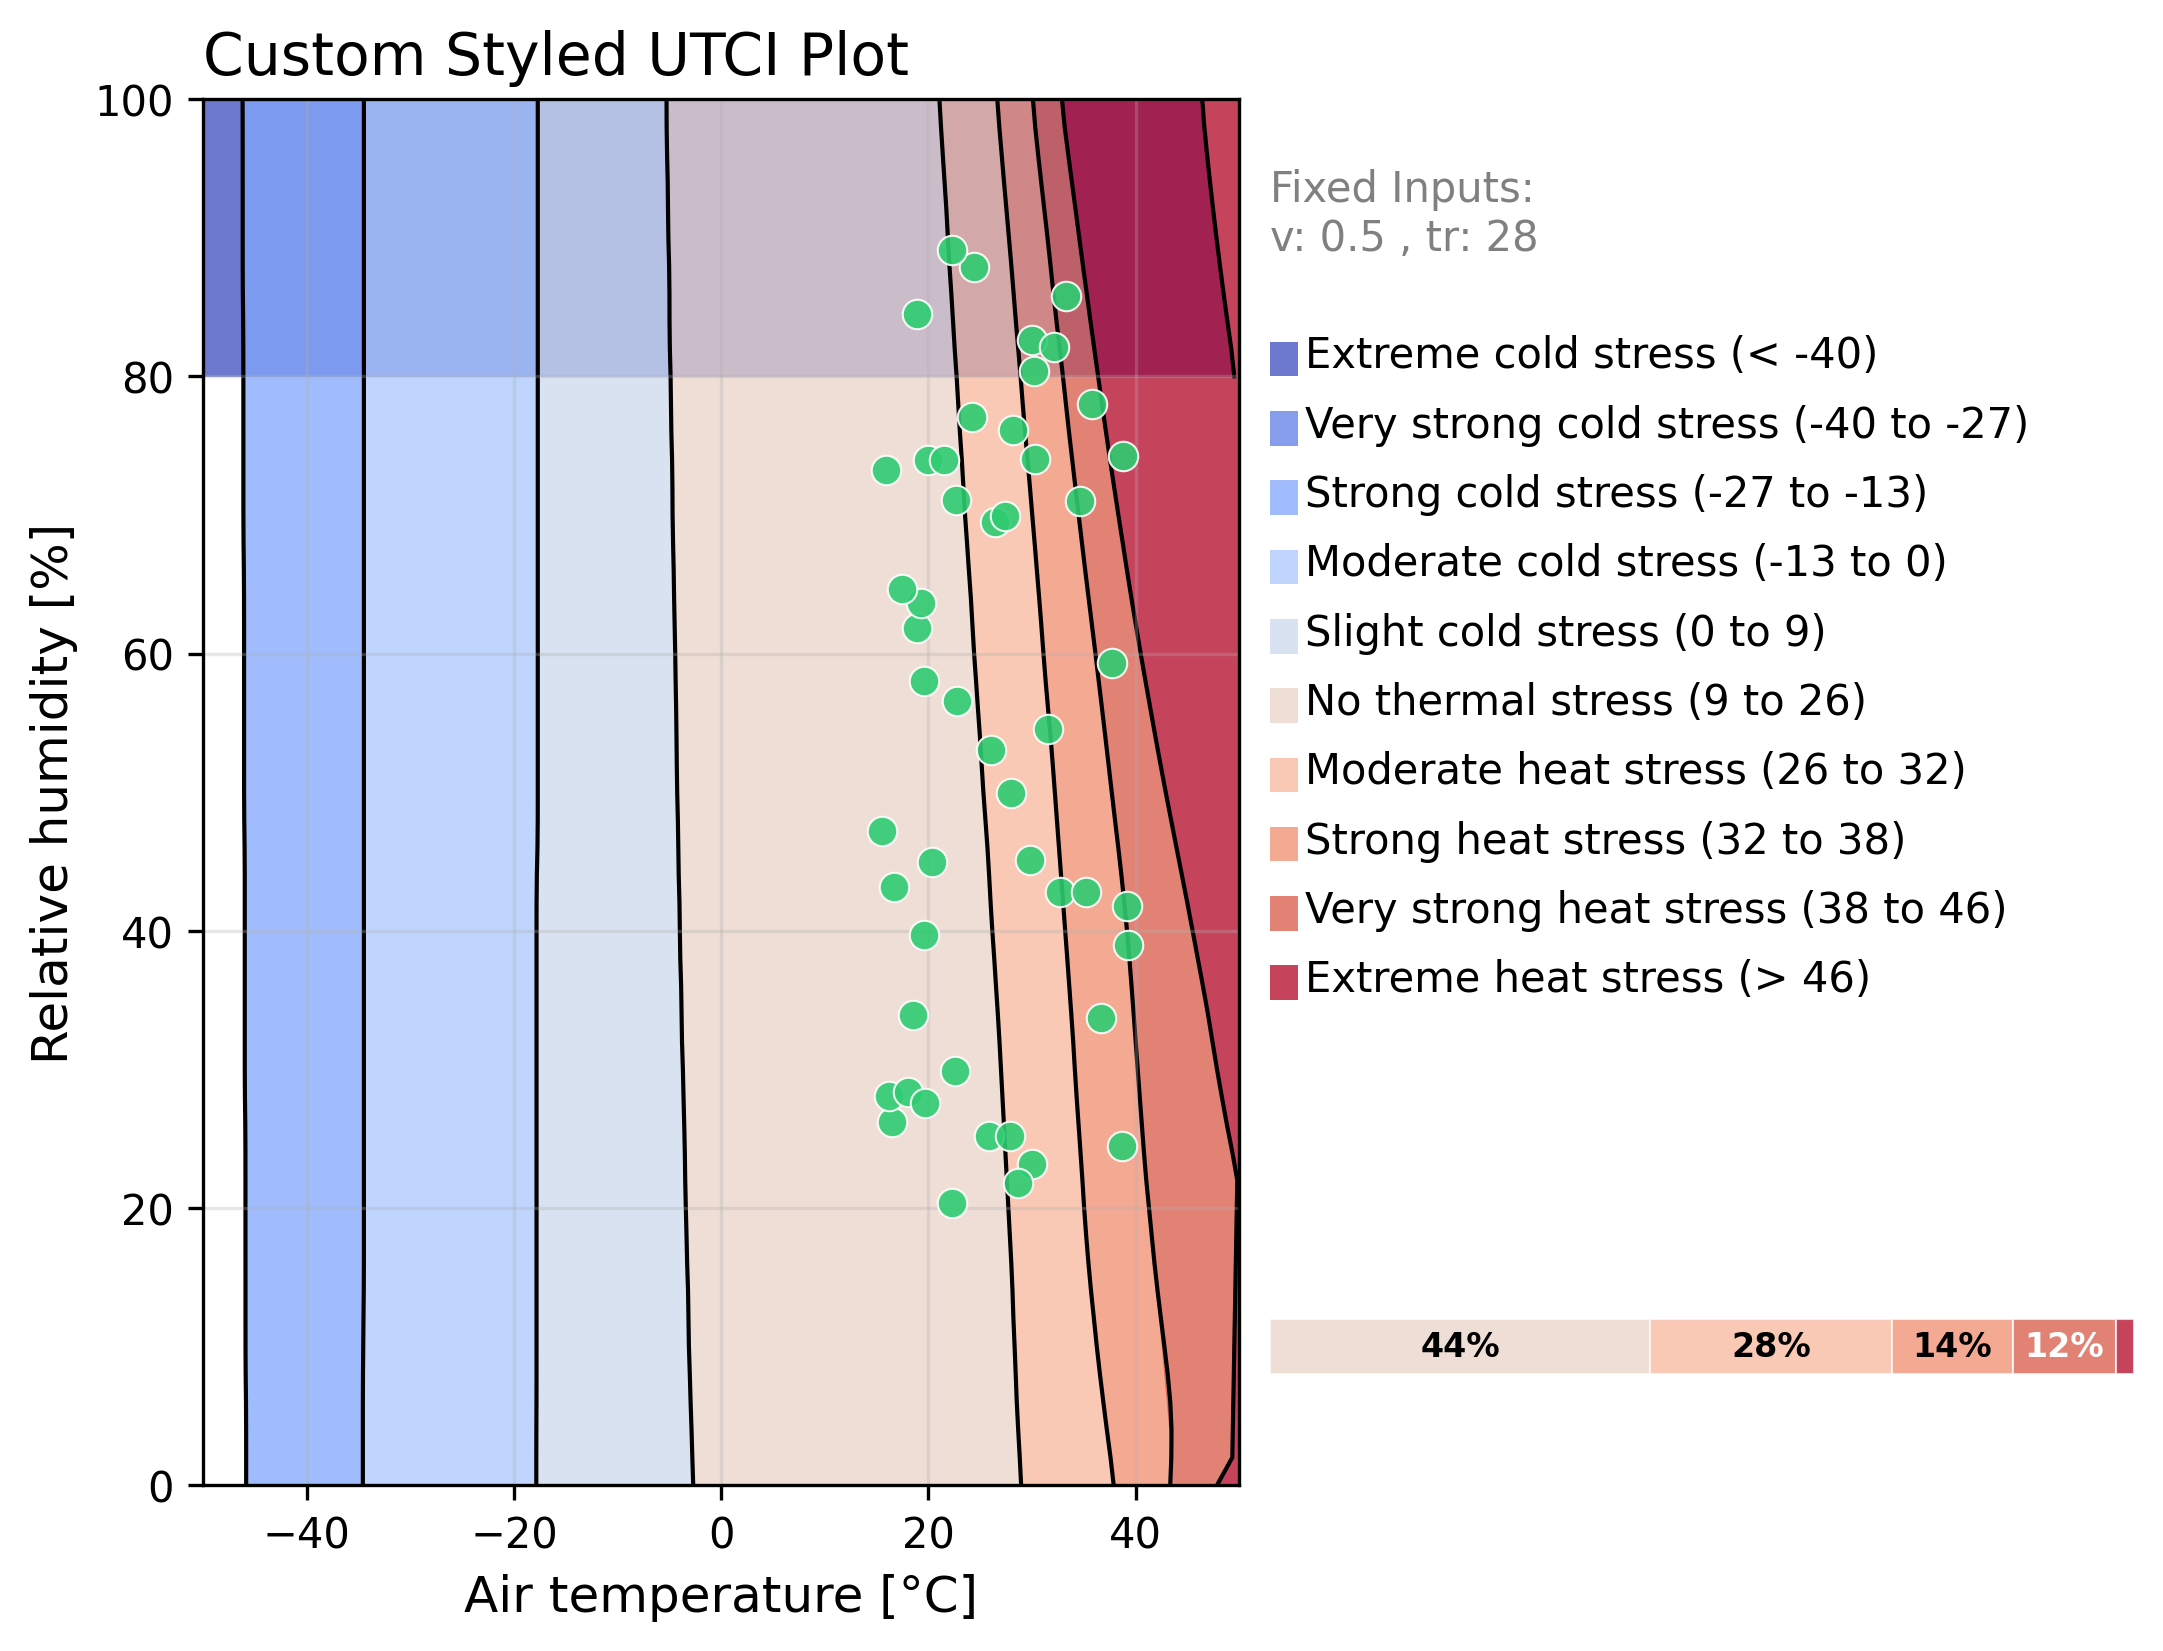

In [20]:
# Create plot with custom style
plot = Plot.range(utci, fixed_params={"v": 0.5, "tr": 28})
plot = plot.add_data(temps, rh_vals)

# Customize style
plot.style.title = "Custom Styled UTCI Plot"
plot.style.figsize = (6, 6)
plot.style.scatter_color = "#2ecc71"  # Green scatter points
plot.style.scatter_size = 50
plot.style.scatter_alpha = 0.9
plot.style.show_grid = True
plot.style.grid_alpha = 0.3
plot.style.show_summary = True
plot.style.summary_bar_width = 2.5

fig, ax = plot.render()

## 10. Fixed Parameters Annotation

Show or hide the fixed parameters annotation on the plot.

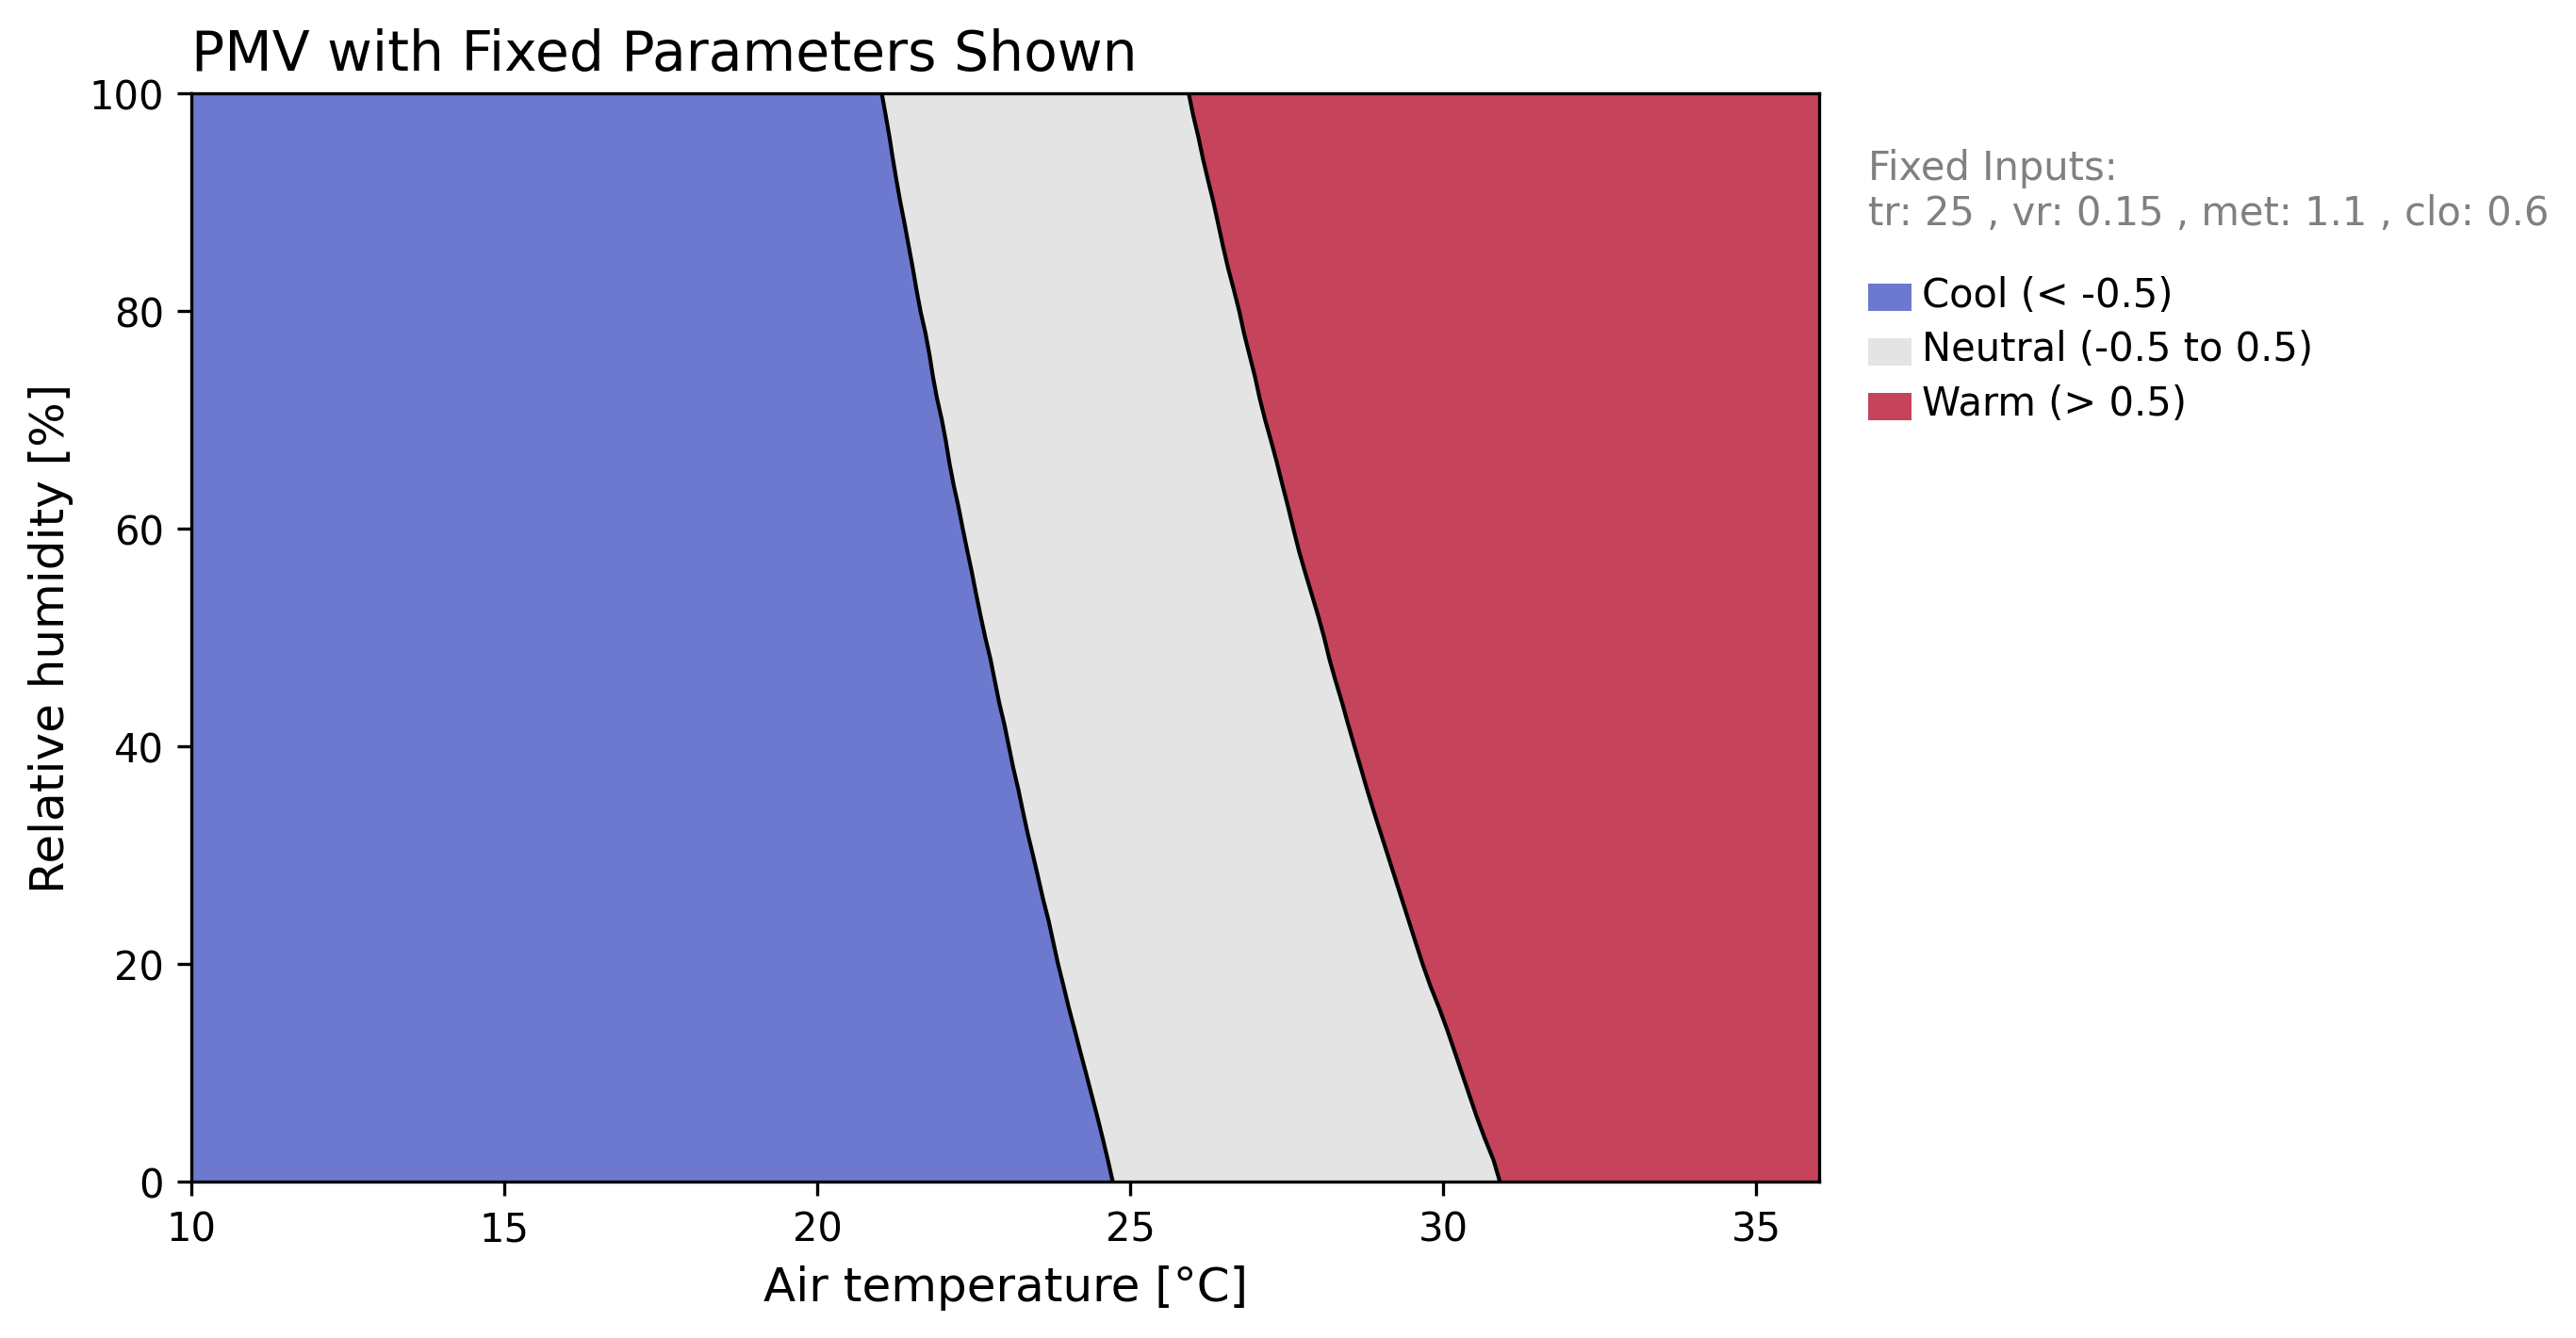

In [21]:
plot = Plot.range(
    pmv_ppd_iso,
    x_param="tdb",
    y_param="rh",
    fixed_params={"tr": 25, "vr": 0.15, "met": 1.1, "clo": 0.6}
)
plot.style.title = "PMV with Fixed Parameters Shown"
plot.style.show_fixed_params = True
fig, ax = plot.render()